In [29]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('D:/데이터/IGAWorks/frequency_encoding_data_no_drop.csv')

In [4]:
data.head()

,click,event_datetime,bid_id,age,marry,predicted_house_price,day,hour,holiday,placement_type_WnrXFsYXNs,...,device_os_version_encode,device_model_encode,device_carrier_encode,device_make_encode,device_language_encode,device_region_encode,device_city_encode,advertisement_id_encode,install_pack_encode,cate_code_encode
0,0,2019-10-01 00:00:05.289,aAEDD9AeIv,8,0,10000.0,1,0,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
1,0,2019-10-02 01:50:55.776,120KZBpPEp,8,0,10000.0,2,1,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
2,0,2019-10-03 07:30:56.756,AMFiNF3X7r,8,0,10000.0,3,7,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
3,0,2019-10-07 00:15:31.816,Mza3hx3DOX,8,0,10000.0,7,0,0,0,...,0.084223,0.094481,0.212653,0.413243,0.651317,0.006898,0.005312,0.031688,0.000002,0.000002
4,0,2019-10-09 15:01:40.412,4GbWwwNnJZ,8,0,10000.0,9,15,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002


In [5]:
df = data.copy()

In [6]:
train = df[df['day'].isin(list(range(1,10)))]
test = df[df['day'] == 10]

In [7]:
X_train = train.iloc[:, 3:]
X_test = test.iloc[:, 3:]
y_train = train['click']
y_test = test['click']

In [8]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1978127, 39)
Number transactions y_train dataset:  (1978127,)
Number transactions X_test dataset:  (254243, 39)
Number transactions y_test dataset:  (254243,)


In [9]:
import lightgbm
from sklearn.metrics import log_loss

### model1: 최적 파라미터로 튜닝한 모델

In [27]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1128527143464075,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 1000,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model1= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model1.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

[1]	training's binary_logloss: 0.283165	training's binary_logloss: 0.283165	valid_1's binary_logloss: 0.296058	valid_1's binary_logloss: 0.296058
[2]	training's binary_logloss: 0.273206	training's binary_logloss: 0.273206	valid_1's binary_logloss: 0.286887	valid_1's binary_logloss: 0.286887
[3]	training's binary_logloss: 0.26572	training's binary_logloss: 0.26572	valid_1's binary_logloss: 0.279562	valid_1's binary_logloss: 0.279562
[4]	training's binary_logloss: 0.2601	training's binary_logloss: 0.2601	valid_1's binary_logloss: 0.274194	valid_1's binary_logloss: 0.274194
[5]	training's binary_logloss: 0.255707	training's binary_logloss: 0.255707	valid_1's binary_logloss: 0.270037	valid_1's binary_logloss: 0.270037
[6]	training's binary_logloss: 0.252233	training's binary_logloss: 0.252233	valid_1's binary_logloss: 0.26673	valid_1's binary_logloss: 0.26673
[7]	training's binary_logloss: 0.249352	training's binary_logloss: 0.249352	valid_1's binary_logloss: 0.264035	valid_1's binary_logl

[56]	training's binary_logloss: 0.23131	training's binary_logloss: 0.23131	valid_1's binary_logloss: 0.249263	valid_1's binary_logloss: 0.249263
[57]	training's binary_logloss: 0.231236	training's binary_logloss: 0.231236	valid_1's binary_logloss: 0.249238	valid_1's binary_logloss: 0.249238
[58]	training's binary_logloss: 0.23117	training's binary_logloss: 0.23117	valid_1's binary_logloss: 0.249209	valid_1's binary_logloss: 0.249209
[59]	training's binary_logloss: 0.231113	training's binary_logloss: 0.231113	valid_1's binary_logloss: 0.249164	valid_1's binary_logloss: 0.249164
[60]	training's binary_logloss: 0.231046	training's binary_logloss: 0.231046	valid_1's binary_logloss: 0.249114	valid_1's binary_logloss: 0.249114
[61]	training's binary_logloss: 0.230994	training's binary_logloss: 0.230994	valid_1's binary_logloss: 0.249087	valid_1's binary_logloss: 0.249087
[62]	training's binary_logloss: 0.23096	training's binary_logloss: 0.23096	valid_1's binary_logloss: 0.24906	valid_1's bin

[111]	training's binary_logloss: 0.229247	training's binary_logloss: 0.229247	valid_1's binary_logloss: 0.247954	valid_1's binary_logloss: 0.247954
[112]	training's binary_logloss: 0.229218	training's binary_logloss: 0.229218	valid_1's binary_logloss: 0.247921	valid_1's binary_logloss: 0.247921
[113]	training's binary_logloss: 0.22919	training's binary_logloss: 0.22919	valid_1's binary_logloss: 0.247903	valid_1's binary_logloss: 0.247903
[114]	training's binary_logloss: 0.229174	training's binary_logloss: 0.229174	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[115]	training's binary_logloss: 0.229138	training's binary_logloss: 0.229138	valid_1's binary_logloss: 0.247874	valid_1's binary_logloss: 0.247874
[116]	training's binary_logloss: 0.229117	training's binary_logloss: 0.229117	valid_1's binary_logloss: 0.247862	valid_1's binary_logloss: 0.247862
[117]	training's binary_logloss: 0.229093	training's binary_logloss: 0.229093	valid_1's binary_logloss: 0.247854	v

[166]	training's binary_logloss: 0.228107	training's binary_logloss: 0.228107	valid_1's binary_logloss: 0.247462	valid_1's binary_logloss: 0.247462
[167]	training's binary_logloss: 0.228075	training's binary_logloss: 0.228075	valid_1's binary_logloss: 0.247451	valid_1's binary_logloss: 0.247451
[168]	training's binary_logloss: 0.228058	training's binary_logloss: 0.228058	valid_1's binary_logloss: 0.247458	valid_1's binary_logloss: 0.247458
[169]	training's binary_logloss: 0.228039	training's binary_logloss: 0.228039	valid_1's binary_logloss: 0.24745	valid_1's binary_logloss: 0.24745
[170]	training's binary_logloss: 0.228021	training's binary_logloss: 0.228021	valid_1's binary_logloss: 0.247436	valid_1's binary_logloss: 0.247436
[171]	training's binary_logloss: 0.228	training's binary_logloss: 0.228	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[172]	training's binary_logloss: 0.22798	training's binary_logloss: 0.22798	valid_1's binary_logloss: 0.24742	valid_1's 

[221]	training's binary_logloss: 0.227144	training's binary_logloss: 0.227144	valid_1's binary_logloss: 0.24712	valid_1's binary_logloss: 0.24712
[222]	training's binary_logloss: 0.227124	training's binary_logloss: 0.227124	valid_1's binary_logloss: 0.247101	valid_1's binary_logloss: 0.247101
[223]	training's binary_logloss: 0.227108	training's binary_logloss: 0.227108	valid_1's binary_logloss: 0.247101	valid_1's binary_logloss: 0.247101
[224]	training's binary_logloss: 0.227096	training's binary_logloss: 0.227096	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[225]	training's binary_logloss: 0.227087	training's binary_logloss: 0.227087	valid_1's binary_logloss: 0.247096	valid_1's binary_logloss: 0.247096
[226]	training's binary_logloss: 0.227072	training's binary_logloss: 0.227072	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[227]	training's binary_logloss: 0.227063	training's binary_logloss: 0.227063	valid_1's binary_logloss: 0.247099	v

[276]	training's binary_logloss: 0.226333	training's binary_logloss: 0.226333	valid_1's binary_logloss: 0.246849	valid_1's binary_logloss: 0.246849
[277]	training's binary_logloss: 0.226313	training's binary_logloss: 0.226313	valid_1's binary_logloss: 0.246837	valid_1's binary_logloss: 0.246837
[278]	training's binary_logloss: 0.226299	training's binary_logloss: 0.226299	valid_1's binary_logloss: 0.246832	valid_1's binary_logloss: 0.246832
[279]	training's binary_logloss: 0.226287	training's binary_logloss: 0.226287	valid_1's binary_logloss: 0.24683	valid_1's binary_logloss: 0.24683
[280]	training's binary_logloss: 0.226274	training's binary_logloss: 0.226274	valid_1's binary_logloss: 0.246827	valid_1's binary_logloss: 0.246827
[281]	training's binary_logloss: 0.226265	training's binary_logloss: 0.226265	valid_1's binary_logloss: 0.246825	valid_1's binary_logloss: 0.246825
[282]	training's binary_logloss: 0.226254	training's binary_logloss: 0.226254	valid_1's binary_logloss: 0.24682	va

[331]	training's binary_logloss: 0.225621	training's binary_logloss: 0.225621	valid_1's binary_logloss: 0.246662	valid_1's binary_logloss: 0.246662
[332]	training's binary_logloss: 0.225607	training's binary_logloss: 0.225607	valid_1's binary_logloss: 0.246664	valid_1's binary_logloss: 0.246664
[333]	training's binary_logloss: 0.225594	training's binary_logloss: 0.225594	valid_1's binary_logloss: 0.246665	valid_1's binary_logloss: 0.246665
[334]	training's binary_logloss: 0.225581	training's binary_logloss: 0.225581	valid_1's binary_logloss: 0.246669	valid_1's binary_logloss: 0.246669
[335]	training's binary_logloss: 0.225573	training's binary_logloss: 0.225573	valid_1's binary_logloss: 0.246668	valid_1's binary_logloss: 0.246668
[336]	training's binary_logloss: 0.22556	training's binary_logloss: 0.22556	valid_1's binary_logloss: 0.246661	valid_1's binary_logloss: 0.246661
[337]	training's binary_logloss: 0.225549	training's binary_logloss: 0.225549	valid_1's binary_logloss: 0.246661	v

[386]	training's binary_logloss: 0.224931	training's binary_logloss: 0.224931	valid_1's binary_logloss: 0.246558	valid_1's binary_logloss: 0.246558
[387]	training's binary_logloss: 0.224921	training's binary_logloss: 0.224921	valid_1's binary_logloss: 0.246561	valid_1's binary_logloss: 0.246561
[388]	training's binary_logloss: 0.224908	training's binary_logloss: 0.224908	valid_1's binary_logloss: 0.24656	valid_1's binary_logloss: 0.24656
[389]	training's binary_logloss: 0.224892	training's binary_logloss: 0.224892	valid_1's binary_logloss: 0.246553	valid_1's binary_logloss: 0.246553
[390]	training's binary_logloss: 0.224884	training's binary_logloss: 0.224884	valid_1's binary_logloss: 0.246552	valid_1's binary_logloss: 0.246552
[391]	training's binary_logloss: 0.224871	training's binary_logloss: 0.224871	valid_1's binary_logloss: 0.246551	valid_1's binary_logloss: 0.246551
[392]	training's binary_logloss: 0.224862	training's binary_logloss: 0.224862	valid_1's binary_logloss: 0.246548	v

[441]	training's binary_logloss: 0.224282	training's binary_logloss: 0.224282	valid_1's binary_logloss: 0.246462	valid_1's binary_logloss: 0.246462
[442]	training's binary_logloss: 0.224269	training's binary_logloss: 0.224269	valid_1's binary_logloss: 0.246457	valid_1's binary_logloss: 0.246457
[443]	training's binary_logloss: 0.224256	training's binary_logloss: 0.224256	valid_1's binary_logloss: 0.246458	valid_1's binary_logloss: 0.246458
[444]	training's binary_logloss: 0.224243	training's binary_logloss: 0.224243	valid_1's binary_logloss: 0.246451	valid_1's binary_logloss: 0.246451
[445]	training's binary_logloss: 0.224236	training's binary_logloss: 0.224236	valid_1's binary_logloss: 0.246444	valid_1's binary_logloss: 0.246444
[446]	training's binary_logloss: 0.224222	training's binary_logloss: 0.224222	valid_1's binary_logloss: 0.246441	valid_1's binary_logloss: 0.246441
[447]	training's binary_logloss: 0.22421	training's binary_logloss: 0.22421	valid_1's binary_logloss: 0.246441	v

[496]	training's binary_logloss: 0.223583	training's binary_logloss: 0.223583	valid_1's binary_logloss: 0.246319	valid_1's binary_logloss: 0.246319
[497]	training's binary_logloss: 0.22357	training's binary_logloss: 0.22357	valid_1's binary_logloss: 0.246318	valid_1's binary_logloss: 0.246318
[498]	training's binary_logloss: 0.223553	training's binary_logloss: 0.223553	valid_1's binary_logloss: 0.246322	valid_1's binary_logloss: 0.246322
[499]	training's binary_logloss: 0.223538	training's binary_logloss: 0.223538	valid_1's binary_logloss: 0.246312	valid_1's binary_logloss: 0.246312
[500]	training's binary_logloss: 0.223525	training's binary_logloss: 0.223525	valid_1's binary_logloss: 0.246312	valid_1's binary_logloss: 0.246312
[501]	training's binary_logloss: 0.223517	training's binary_logloss: 0.223517	valid_1's binary_logloss: 0.24631	valid_1's binary_logloss: 0.24631
[502]	training's binary_logloss: 0.223512	training's binary_logloss: 0.223512	valid_1's binary_logloss: 0.24631	vali

[551]	training's binary_logloss: 0.222995	training's binary_logloss: 0.222995	valid_1's binary_logloss: 0.246261	valid_1's binary_logloss: 0.246261
[552]	training's binary_logloss: 0.222984	training's binary_logloss: 0.222984	valid_1's binary_logloss: 0.246263	valid_1's binary_logloss: 0.246263
[553]	training's binary_logloss: 0.22297	training's binary_logloss: 0.22297	valid_1's binary_logloss: 0.246265	valid_1's binary_logloss: 0.246265
[554]	training's binary_logloss: 0.222964	training's binary_logloss: 0.222964	valid_1's binary_logloss: 0.246266	valid_1's binary_logloss: 0.246266
[555]	training's binary_logloss: 0.222954	training's binary_logloss: 0.222954	valid_1's binary_logloss: 0.246269	valid_1's binary_logloss: 0.246269
[556]	training's binary_logloss: 0.222942	training's binary_logloss: 0.222942	valid_1's binary_logloss: 0.246269	valid_1's binary_logloss: 0.246269
[557]	training's binary_logloss: 0.222935	training's binary_logloss: 0.222935	valid_1's binary_logloss: 0.246267	v

[606]	training's binary_logloss: 0.222388	training's binary_logloss: 0.222388	valid_1's binary_logloss: 0.246269	valid_1's binary_logloss: 0.246269
[607]	training's binary_logloss: 0.222377	training's binary_logloss: 0.222377	valid_1's binary_logloss: 0.246267	valid_1's binary_logloss: 0.246267
[608]	training's binary_logloss: 0.222369	training's binary_logloss: 0.222369	valid_1's binary_logloss: 0.246268	valid_1's binary_logloss: 0.246268
[609]	training's binary_logloss: 0.222356	training's binary_logloss: 0.222356	valid_1's binary_logloss: 0.246265	valid_1's binary_logloss: 0.246265
[610]	training's binary_logloss: 0.222349	training's binary_logloss: 0.222349	valid_1's binary_logloss: 0.246264	valid_1's binary_logloss: 0.246264
[611]	training's binary_logloss: 0.222341	training's binary_logloss: 0.222341	valid_1's binary_logloss: 0.246262	valid_1's binary_logloss: 0.246262
[612]	training's binary_logloss: 0.222328	training's binary_logloss: 0.222328	valid_1's binary_logloss: 0.246262

[661]	training's binary_logloss: 0.221818	training's binary_logloss: 0.221818	valid_1's binary_logloss: 0.246222	valid_1's binary_logloss: 0.246222
[662]	training's binary_logloss: 0.221812	training's binary_logloss: 0.221812	valid_1's binary_logloss: 0.246219	valid_1's binary_logloss: 0.246219
[663]	training's binary_logloss: 0.221802	training's binary_logloss: 0.221802	valid_1's binary_logloss: 0.246215	valid_1's binary_logloss: 0.246215
[664]	training's binary_logloss: 0.221789	training's binary_logloss: 0.221789	valid_1's binary_logloss: 0.246211	valid_1's binary_logloss: 0.246211
[665]	training's binary_logloss: 0.221783	training's binary_logloss: 0.221783	valid_1's binary_logloss: 0.246211	valid_1's binary_logloss: 0.246211
[666]	training's binary_logloss: 0.221773	training's binary_logloss: 0.221773	valid_1's binary_logloss: 0.24621	valid_1's binary_logloss: 0.24621
[667]	training's binary_logloss: 0.221767	training's binary_logloss: 0.221767	valid_1's binary_logloss: 0.246209	v

[716]	training's binary_logloss: 0.221303	training's binary_logloss: 0.221303	valid_1's binary_logloss: 0.24618	valid_1's binary_logloss: 0.24618
[717]	training's binary_logloss: 0.221294	training's binary_logloss: 0.221294	valid_1's binary_logloss: 0.24618	valid_1's binary_logloss: 0.24618
[718]	training's binary_logloss: 0.221283	training's binary_logloss: 0.221283	valid_1's binary_logloss: 0.246184	valid_1's binary_logloss: 0.246184
[719]	training's binary_logloss: 0.221272	training's binary_logloss: 0.221272	valid_1's binary_logloss: 0.246185	valid_1's binary_logloss: 0.246185
[720]	training's binary_logloss: 0.221258	training's binary_logloss: 0.221258	valid_1's binary_logloss: 0.246186	valid_1's binary_logloss: 0.246186
[721]	training's binary_logloss: 0.221252	training's binary_logloss: 0.221252	valid_1's binary_logloss: 0.246189	valid_1's binary_logloss: 0.246189
[722]	training's binary_logloss: 0.221234	training's binary_logloss: 0.221234	valid_1's binary_logloss: 0.246182	val

[771]	training's binary_logloss: 0.220726	training's binary_logloss: 0.220726	valid_1's binary_logloss: 0.246161	valid_1's binary_logloss: 0.246161
[772]	training's binary_logloss: 0.220717	training's binary_logloss: 0.220717	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[773]	training's binary_logloss: 0.22071	training's binary_logloss: 0.22071	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[774]	training's binary_logloss: 0.220704	training's binary_logloss: 0.220704	valid_1's binary_logloss: 0.246159	valid_1's binary_logloss: 0.246159
[775]	training's binary_logloss: 0.220695	training's binary_logloss: 0.220695	valid_1's binary_logloss: 0.24616	valid_1's binary_logloss: 0.24616
[776]	training's binary_logloss: 0.220687	training's binary_logloss: 0.220687	valid_1's binary_logloss: 0.246161	valid_1's binary_logloss: 0.246161
[777]	training's binary_logloss: 0.220676	training's binary_logloss: 0.220676	valid_1's binary_logloss: 0.246162	val

[826]	training's binary_logloss: 0.220223	training's binary_logloss: 0.220223	valid_1's binary_logloss: 0.246141	valid_1's binary_logloss: 0.246141
[827]	training's binary_logloss: 0.220215	training's binary_logloss: 0.220215	valid_1's binary_logloss: 0.246143	valid_1's binary_logloss: 0.246143
[828]	training's binary_logloss: 0.220202	training's binary_logloss: 0.220202	valid_1's binary_logloss: 0.246147	valid_1's binary_logloss: 0.246147
[829]	training's binary_logloss: 0.220197	training's binary_logloss: 0.220197	valid_1's binary_logloss: 0.246148	valid_1's binary_logloss: 0.246148
[830]	training's binary_logloss: 0.220187	training's binary_logloss: 0.220187	valid_1's binary_logloss: 0.246149	valid_1's binary_logloss: 0.246149
[831]	training's binary_logloss: 0.220177	training's binary_logloss: 0.220177	valid_1's binary_logloss: 0.246147	valid_1's binary_logloss: 0.246147
[832]	training's binary_logloss: 0.220168	training's binary_logloss: 0.220168	valid_1's binary_logloss: 0.246141

[881]	training's binary_logloss: 0.219713	training's binary_logloss: 0.219713	valid_1's binary_logloss: 0.246153	valid_1's binary_logloss: 0.246153
[882]	training's binary_logloss: 0.219702	training's binary_logloss: 0.219702	valid_1's binary_logloss: 0.246156	valid_1's binary_logloss: 0.246156
[883]	training's binary_logloss: 0.219693	training's binary_logloss: 0.219693	valid_1's binary_logloss: 0.246155	valid_1's binary_logloss: 0.246155
[884]	training's binary_logloss: 0.21969	training's binary_logloss: 0.21969	valid_1's binary_logloss: 0.246156	valid_1's binary_logloss: 0.246156
[885]	training's binary_logloss: 0.219679	training's binary_logloss: 0.219679	valid_1's binary_logloss: 0.246152	valid_1's binary_logloss: 0.246152
[886]	training's binary_logloss: 0.21967	training's binary_logloss: 0.21967	valid_1's binary_logloss: 0.24615	valid_1's binary_logloss: 0.24615
[887]	training's binary_logloss: 0.219663	training's binary_logloss: 0.219663	valid_1's binary_logloss: 0.246147	valid

[936]	training's binary_logloss: 0.219265	training's binary_logloss: 0.219265	valid_1's binary_logloss: 0.246153	valid_1's binary_logloss: 0.246153
[937]	training's binary_logloss: 0.219256	training's binary_logloss: 0.219256	valid_1's binary_logloss: 0.246152	valid_1's binary_logloss: 0.246152
[938]	training's binary_logloss: 0.219248	training's binary_logloss: 0.219248	valid_1's binary_logloss: 0.246153	valid_1's binary_logloss: 0.246153
[939]	training's binary_logloss: 0.219236	training's binary_logloss: 0.219236	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[940]	training's binary_logloss: 0.21923	training's binary_logloss: 0.21923	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[941]	training's binary_logloss: 0.219217	training's binary_logloss: 0.219217	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[942]	training's binary_logloss: 0.219205	training's binary_logloss: 0.219205	valid_1's binary_logloss: 0.24616	va

[991]	training's binary_logloss: 0.218735	training's binary_logloss: 0.218735	valid_1's binary_logloss: 0.246173	valid_1's binary_logloss: 0.246173
[992]	training's binary_logloss: 0.218725	training's binary_logloss: 0.218725	valid_1's binary_logloss: 0.246171	valid_1's binary_logloss: 0.246171
[993]	training's binary_logloss: 0.218717	training's binary_logloss: 0.218717	valid_1's binary_logloss: 0.246176	valid_1's binary_logloss: 0.246176
[994]	training's binary_logloss: 0.218712	training's binary_logloss: 0.218712	valid_1's binary_logloss: 0.246178	valid_1's binary_logloss: 0.246178
[995]	training's binary_logloss: 0.218701	training's binary_logloss: 0.218701	valid_1's binary_logloss: 0.246175	valid_1's binary_logloss: 0.246175
[996]	training's binary_logloss: 0.218693	training's binary_logloss: 0.218693	valid_1's binary_logloss: 0.246176	valid_1's binary_logloss: 0.246176
[997]	training's binary_logloss: 0.218687	training's binary_logloss: 0.218687	valid_1's binary_logloss: 0.246175

LGBMClassifier(bagging_freq=15, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.24089912543315553,
               importance_type='split', learning_rate=0.1128527143464075,
               max_bin=495, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=49, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [26]:
lg_loan_status_probas = model1.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.2461682389251206


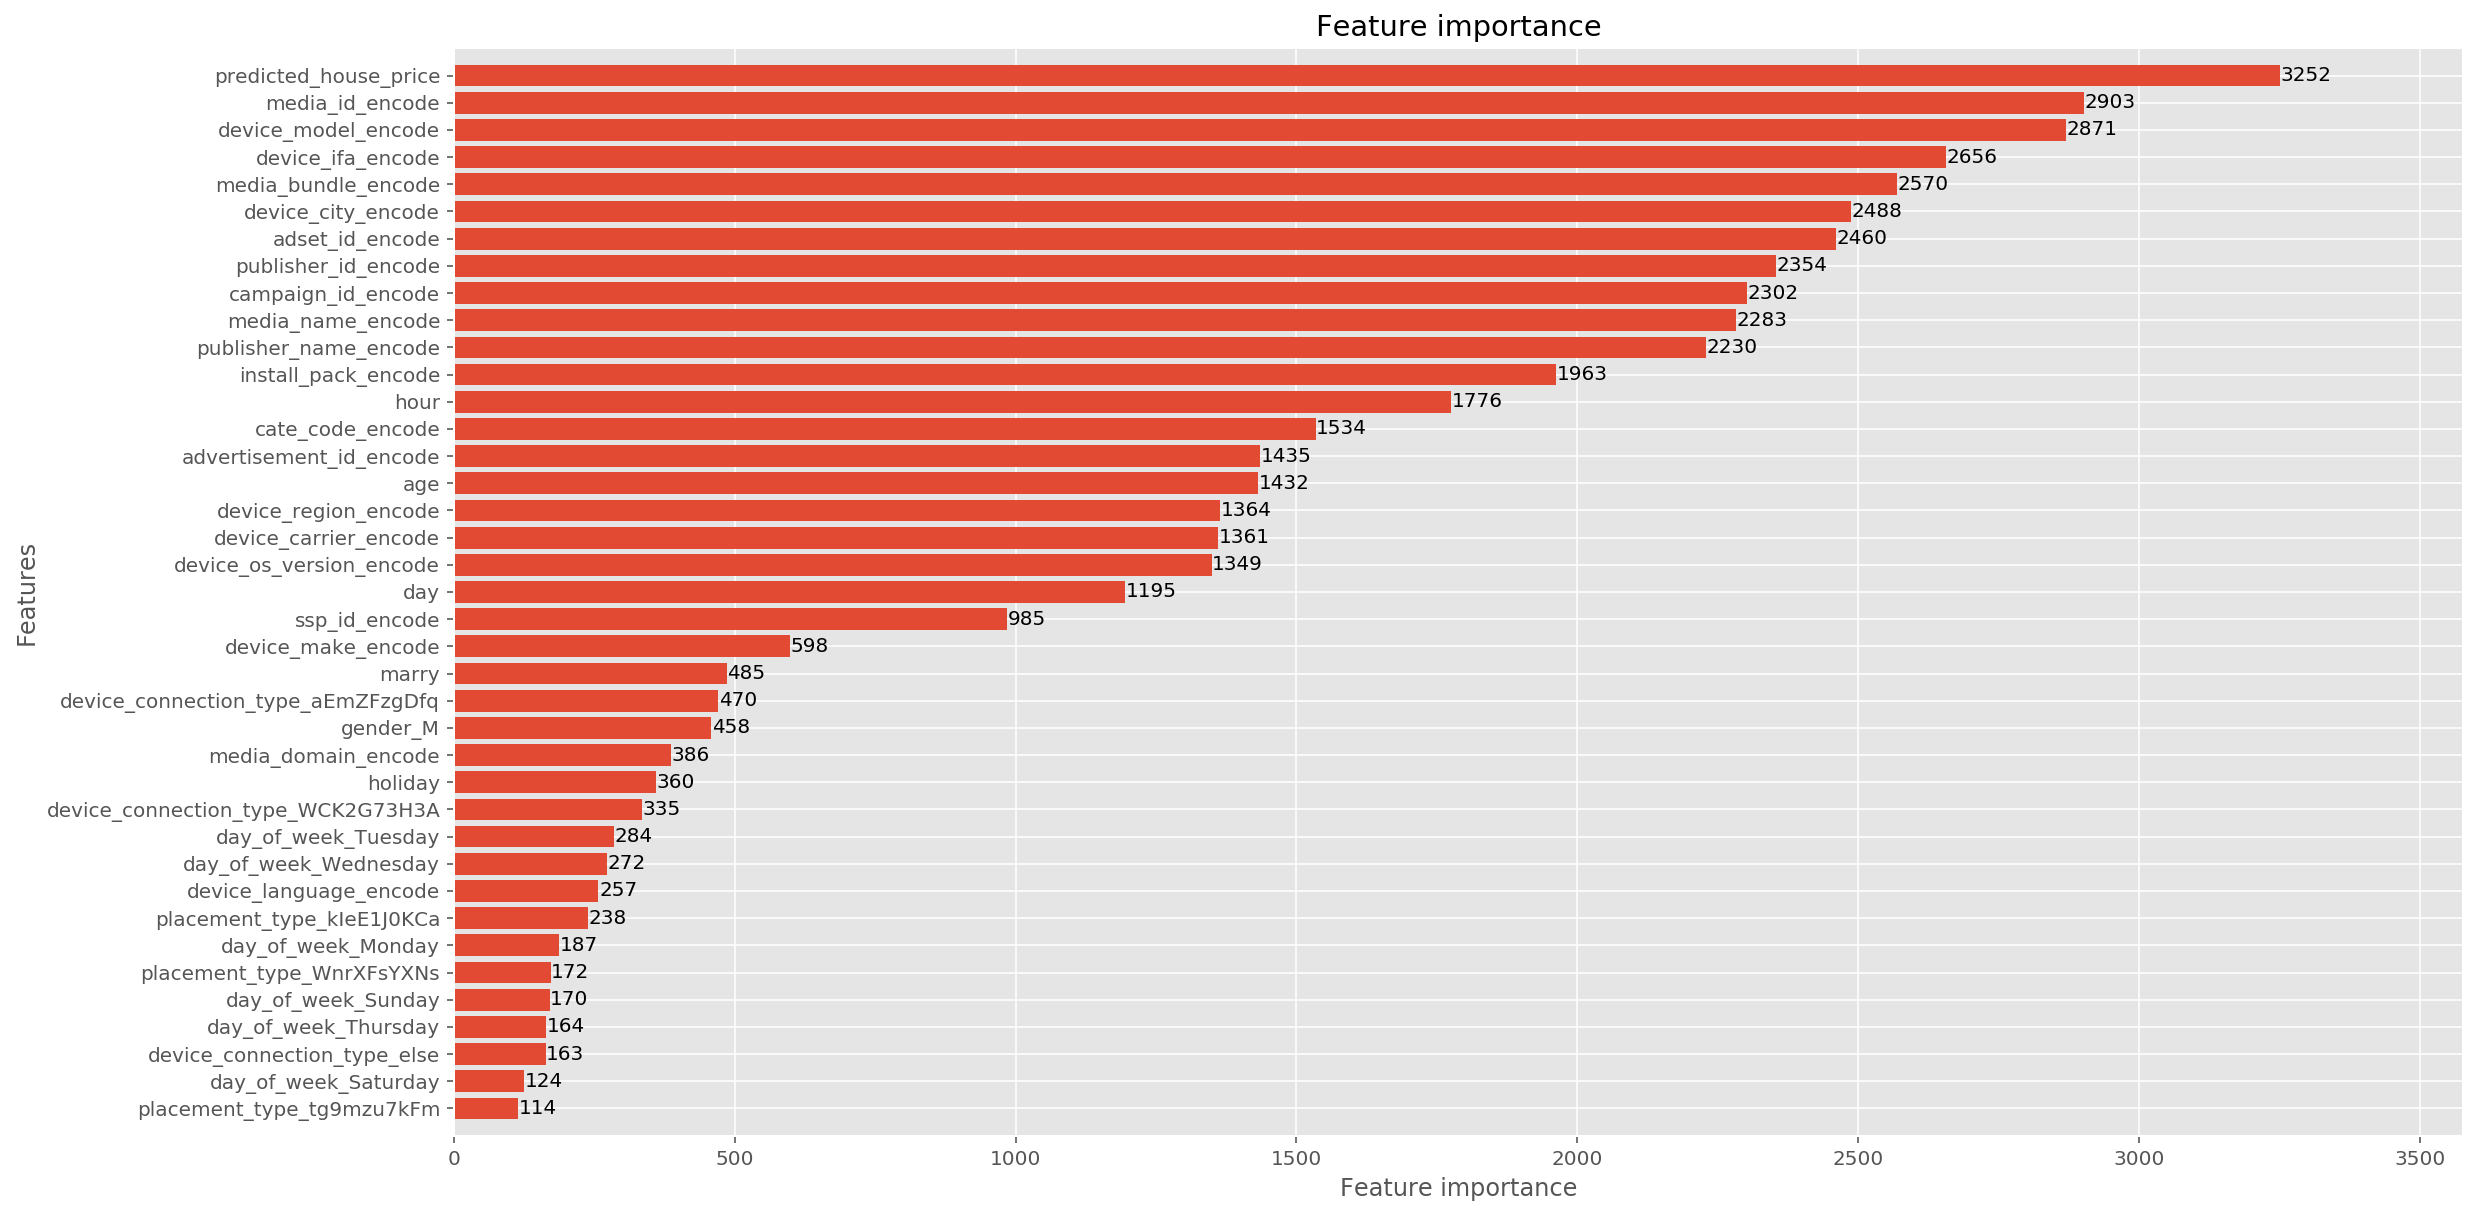

In [27]:
lightgbm.plot_importance(model1, max_num_features  = 100, ignore_zero=True, figsize = (18, 10), height=0.8)

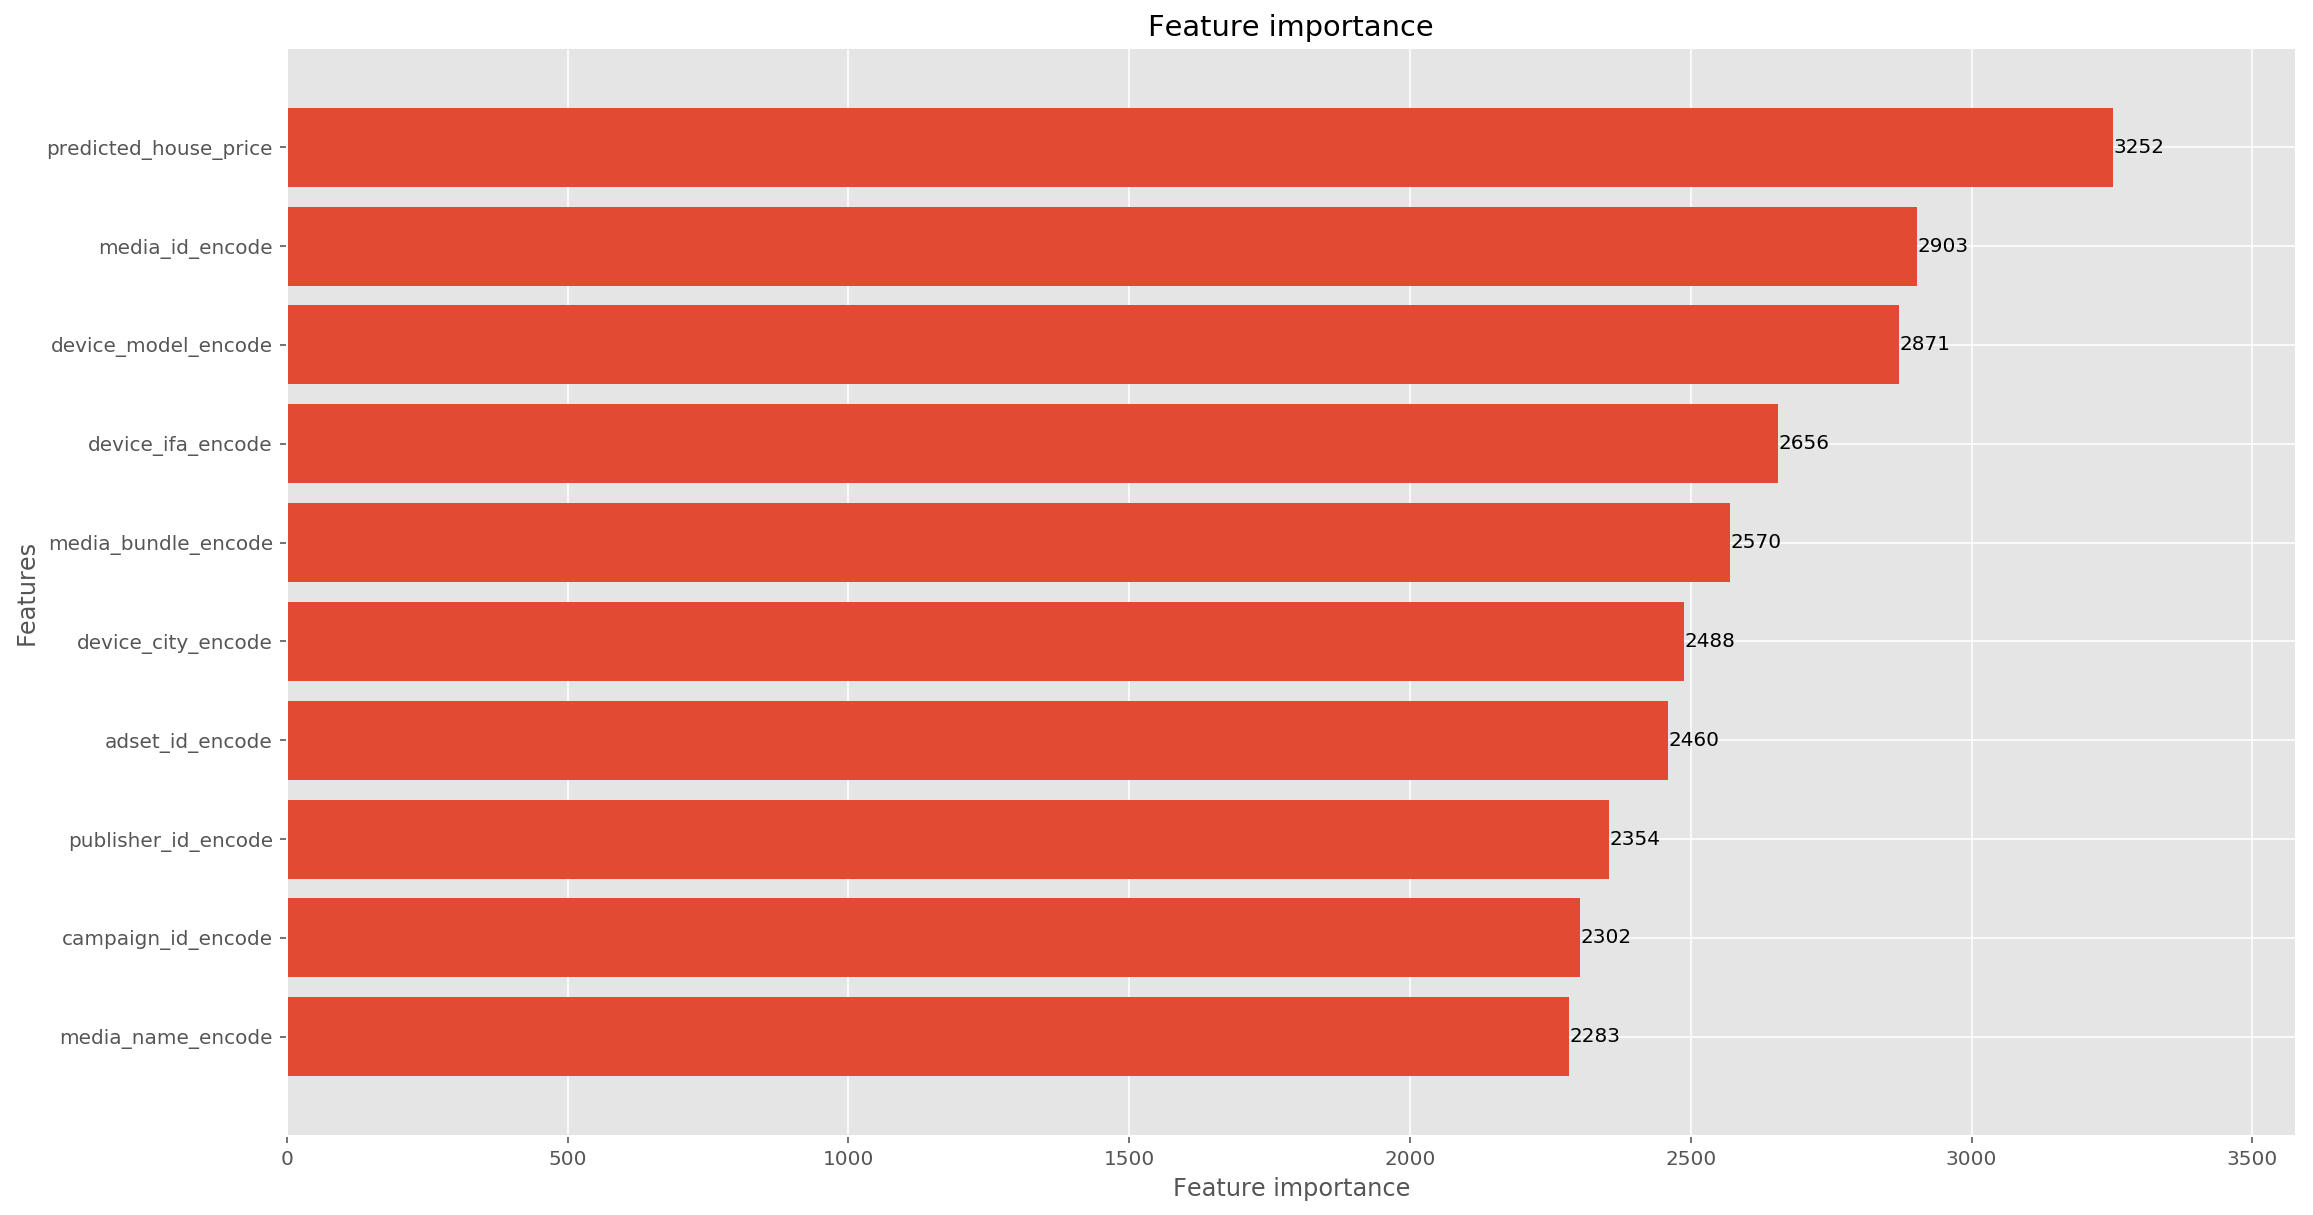

In [28]:
lightgbm.plot_importance(model1, max_num_features  = 10, ignore_zero=True, figsize = (18, 10), height=0.8)

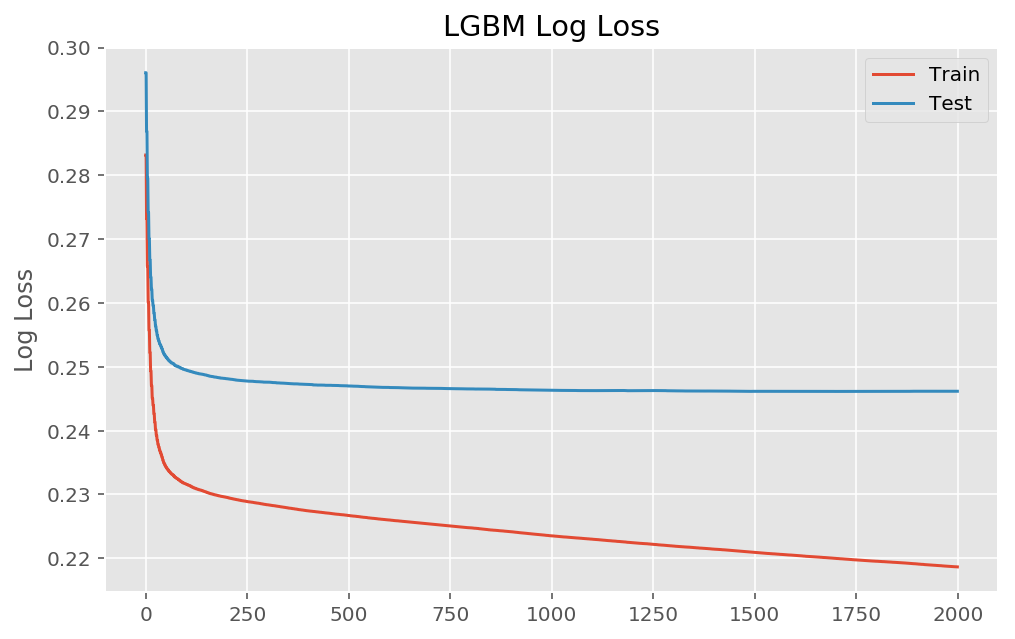

In [29]:
# retrieve performance metrics
results = model1.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()

### model2 : SelectFromModel feature selection 진행 -> 역시나 성능 더 안좋아짐

In [14]:
from sklearn.feature_selection import SelectFromModel

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1128527143464075,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 1000,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

lgbc= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]

embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(X_train.columns))
embeded_lgb_selector.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.283165	training's binary_logloss: 0.283165	valid_1's binary_logloss: 0.296058	valid_1's binary_logloss: 0.296058
[2]	training's binary_logloss: 0.273206	training's binary_logloss: 0.273206	valid_1's binary_logloss: 0.286887	valid_1's binary_logloss: 0.286887
[3]	training's binary_logloss: 0.26572	training's binary_logloss: 0.26572	valid_1's binary_logloss: 0.279562	valid_1's binary_logloss: 0.279562
[4]	training's binary_logloss: 0.2601	training's binary_logloss: 0.2601	valid_1's binary_logloss: 0.274194	valid_1's binary_logloss: 0.274194
[5]	training's binary_logloss: 0.255707	training's binary_logloss: 0.255707	valid_1's binary_logloss: 0.270037	valid_1's binary_logloss: 0.270037
[6]	training's binary_logloss: 0.252233	training's binary_logloss: 0.252233	valid_1's binary_logloss: 0.26673	valid_1's binary_logloss: 0.26673
[7]	training's binary_logloss: 0.249352	training's binary_logloss: 0.249352	valid_1's binary_logloss: 0.264035	valid_1's binary_logl

[58]	training's binary_logloss: 0.23117	training's binary_logloss: 0.23117	valid_1's binary_logloss: 0.249209	valid_1's binary_logloss: 0.249209
[59]	training's binary_logloss: 0.231113	training's binary_logloss: 0.231113	valid_1's binary_logloss: 0.249164	valid_1's binary_logloss: 0.249164
[60]	training's binary_logloss: 0.231046	training's binary_logloss: 0.231046	valid_1's binary_logloss: 0.249114	valid_1's binary_logloss: 0.249114
[61]	training's binary_logloss: 0.230994	training's binary_logloss: 0.230994	valid_1's binary_logloss: 0.249087	valid_1's binary_logloss: 0.249087
[62]	training's binary_logloss: 0.23096	training's binary_logloss: 0.23096	valid_1's binary_logloss: 0.24906	valid_1's binary_logloss: 0.24906
[63]	training's binary_logloss: 0.230889	training's binary_logloss: 0.230889	valid_1's binary_logloss: 0.249008	valid_1's binary_logloss: 0.249008
[64]	training's binary_logloss: 0.230859	training's binary_logloss: 0.230859	valid_1's binary_logloss: 0.24899	valid_1's bin

[169]	training's binary_logloss: 0.228039	training's binary_logloss: 0.228039	valid_1's binary_logloss: 0.24745	valid_1's binary_logloss: 0.24745
[170]	training's binary_logloss: 0.228021	training's binary_logloss: 0.228021	valid_1's binary_logloss: 0.247436	valid_1's binary_logloss: 0.247436
[171]	training's binary_logloss: 0.228	training's binary_logloss: 0.228	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[172]	training's binary_logloss: 0.22798	training's binary_logloss: 0.22798	valid_1's binary_logloss: 0.24742	valid_1's binary_logloss: 0.24742
[173]	training's binary_logloss: 0.227963	training's binary_logloss: 0.227963	valid_1's binary_logloss: 0.247414	valid_1's binary_logloss: 0.247414
[174]	training's binary_logloss: 0.227941	training's binary_logloss: 0.227941	valid_1's binary_logloss: 0.247407	valid_1's binary_logloss: 0.247407
[175]	training's binary_logloss: 0.227918	training's binary_logloss: 0.227918	valid_1's binary_logloss: 0.247393	valid_1's b

[226]	training's binary_logloss: 0.227072	training's binary_logloss: 0.227072	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[227]	training's binary_logloss: 0.227063	training's binary_logloss: 0.227063	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[228]	training's binary_logloss: 0.227045	training's binary_logloss: 0.227045	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[229]	training's binary_logloss: 0.227029	training's binary_logloss: 0.227029	valid_1's binary_logloss: 0.247098	valid_1's binary_logloss: 0.247098
[230]	training's binary_logloss: 0.227008	training's binary_logloss: 0.227008	valid_1's binary_logloss: 0.247084	valid_1's binary_logloss: 0.247084
[231]	training's binary_logloss: 0.226989	training's binary_logloss: 0.226989	valid_1's binary_logloss: 0.247086	valid_1's binary_logloss: 0.247086
[232]	training's binary_logloss: 0.226973	training's binary_logloss: 0.226973	valid_1's binary_logloss: 0.247081

[282]	training's binary_logloss: 0.226254	training's binary_logloss: 0.226254	valid_1's binary_logloss: 0.24682	valid_1's binary_logloss: 0.24682
[283]	training's binary_logloss: 0.226238	training's binary_logloss: 0.226238	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[284]	training's binary_logloss: 0.226227	training's binary_logloss: 0.226227	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[285]	training's binary_logloss: 0.226208	training's binary_logloss: 0.226208	valid_1's binary_logloss: 0.24681	valid_1's binary_logloss: 0.24681
[286]	training's binary_logloss: 0.22619	training's binary_logloss: 0.22619	valid_1's binary_logloss: 0.246803	valid_1's binary_logloss: 0.246803
[287]	training's binary_logloss: 0.226177	training's binary_logloss: 0.226177	valid_1's binary_logloss: 0.246795	valid_1's binary_logloss: 0.246795
[288]	training's binary_logloss: 0.226164	training's binary_logloss: 0.226164	valid_1's binary_logloss: 0.246791	valid

[338]	training's binary_logloss: 0.225532	training's binary_logloss: 0.225532	valid_1's binary_logloss: 0.246659	valid_1's binary_logloss: 0.246659
[339]	training's binary_logloss: 0.225516	training's binary_logloss: 0.225516	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[340]	training's binary_logloss: 0.225503	training's binary_logloss: 0.225503	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[341]	training's binary_logloss: 0.225493	training's binary_logloss: 0.225493	valid_1's binary_logloss: 0.246652	valid_1's binary_logloss: 0.246652
[342]	training's binary_logloss: 0.225482	training's binary_logloss: 0.225482	valid_1's binary_logloss: 0.246648	valid_1's binary_logloss: 0.246648
[343]	training's binary_logloss: 0.225467	training's binary_logloss: 0.225467	valid_1's binary_logloss: 0.246645	valid_1's binary_logloss: 0.246645
[344]	training's binary_logloss: 0.225454	training's binary_logloss: 0.225454	valid_1's binary_logloss: 0.246647

[394]	training's binary_logloss: 0.224843	training's binary_logloss: 0.224843	valid_1's binary_logloss: 0.246548	valid_1's binary_logloss: 0.246548
[395]	training's binary_logloss: 0.22483	training's binary_logloss: 0.22483	valid_1's binary_logloss: 0.24654	valid_1's binary_logloss: 0.24654
[396]	training's binary_logloss: 0.22482	training's binary_logloss: 0.22482	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[397]	training's binary_logloss: 0.224811	training's binary_logloss: 0.224811	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[398]	training's binary_logloss: 0.224799	training's binary_logloss: 0.224799	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[399]	training's binary_logloss: 0.224791	training's binary_logloss: 0.224791	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[400]	training's binary_logloss: 0.224782	training's binary_logloss: 0.224782	valid_1's binary_logloss: 0.246526	valid_1's

[450]	training's binary_logloss: 0.224172	training's binary_logloss: 0.224172	valid_1's binary_logloss: 0.246435	valid_1's binary_logloss: 0.246435
[451]	training's binary_logloss: 0.224164	training's binary_logloss: 0.224164	valid_1's binary_logloss: 0.246436	valid_1's binary_logloss: 0.246436
[452]	training's binary_logloss: 0.22415	training's binary_logloss: 0.22415	valid_1's binary_logloss: 0.246437	valid_1's binary_logloss: 0.246437
[453]	training's binary_logloss: 0.224142	training's binary_logloss: 0.224142	valid_1's binary_logloss: 0.246434	valid_1's binary_logloss: 0.246434
[454]	training's binary_logloss: 0.22413	training's binary_logloss: 0.22413	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[455]	training's binary_logloss: 0.224116	training's binary_logloss: 0.224116	valid_1's binary_logloss: 0.246431	valid_1's binary_logloss: 0.246431
[456]	training's binary_logloss: 0.224097	training's binary_logloss: 0.224097	valid_1's binary_logloss: 0.246428	val

[506]	training's binary_logloss: 0.223464	training's binary_logloss: 0.223464	valid_1's binary_logloss: 0.246305	valid_1's binary_logloss: 0.246305
[507]	training's binary_logloss: 0.223452	training's binary_logloss: 0.223452	valid_1's binary_logloss: 0.246307	valid_1's binary_logloss: 0.246307
[508]	training's binary_logloss: 0.223445	training's binary_logloss: 0.223445	valid_1's binary_logloss: 0.246304	valid_1's binary_logloss: 0.246304
[509]	training's binary_logloss: 0.223431	training's binary_logloss: 0.223431	valid_1's binary_logloss: 0.246304	valid_1's binary_logloss: 0.246304
[510]	training's binary_logloss: 0.223415	training's binary_logloss: 0.223415	valid_1's binary_logloss: 0.246301	valid_1's binary_logloss: 0.246301
[511]	training's binary_logloss: 0.223406	training's binary_logloss: 0.223406	valid_1's binary_logloss: 0.246299	valid_1's binary_logloss: 0.246299
[512]	training's binary_logloss: 0.223392	training's binary_logloss: 0.223392	valid_1's binary_logloss: 0.246298

[563]	training's binary_logloss: 0.222864	training's binary_logloss: 0.222864	valid_1's binary_logloss: 0.246267	valid_1's binary_logloss: 0.246267
[564]	training's binary_logloss: 0.222851	training's binary_logloss: 0.222851	valid_1's binary_logloss: 0.246272	valid_1's binary_logloss: 0.246272
[565]	training's binary_logloss: 0.222842	training's binary_logloss: 0.222842	valid_1's binary_logloss: 0.246275	valid_1's binary_logloss: 0.246275
[566]	training's binary_logloss: 0.22283	training's binary_logloss: 0.22283	valid_1's binary_logloss: 0.246278	valid_1's binary_logloss: 0.246278
[567]	training's binary_logloss: 0.222818	training's binary_logloss: 0.222818	valid_1's binary_logloss: 0.246281	valid_1's binary_logloss: 0.246281
[568]	training's binary_logloss: 0.222807	training's binary_logloss: 0.222807	valid_1's binary_logloss: 0.246272	valid_1's binary_logloss: 0.246272
[569]	training's binary_logloss: 0.222791	training's binary_logloss: 0.222791	valid_1's binary_logloss: 0.246271	v

[619]	training's binary_logloss: 0.222271	training's binary_logloss: 0.222271	valid_1's binary_logloss: 0.246282	valid_1's binary_logloss: 0.246282
[620]	training's binary_logloss: 0.22226	training's binary_logloss: 0.22226	valid_1's binary_logloss: 0.246275	valid_1's binary_logloss: 0.246275
[621]	training's binary_logloss: 0.222248	training's binary_logloss: 0.222248	valid_1's binary_logloss: 0.246279	valid_1's binary_logloss: 0.246279
[622]	training's binary_logloss: 0.222233	training's binary_logloss: 0.222233	valid_1's binary_logloss: 0.246278	valid_1's binary_logloss: 0.246278
[623]	training's binary_logloss: 0.222223	training's binary_logloss: 0.222223	valid_1's binary_logloss: 0.246279	valid_1's binary_logloss: 0.246279
[624]	training's binary_logloss: 0.222214	training's binary_logloss: 0.222214	valid_1's binary_logloss: 0.24628	valid_1's binary_logloss: 0.24628
[625]	training's binary_logloss: 0.222203	training's binary_logloss: 0.222203	valid_1's binary_logloss: 0.246277	val

[675]	training's binary_logloss: 0.221694	training's binary_logloss: 0.221694	valid_1's binary_logloss: 0.246198	valid_1's binary_logloss: 0.246198
[676]	training's binary_logloss: 0.221682	training's binary_logloss: 0.221682	valid_1's binary_logloss: 0.246194	valid_1's binary_logloss: 0.246194
[677]	training's binary_logloss: 0.221673	training's binary_logloss: 0.221673	valid_1's binary_logloss: 0.246187	valid_1's binary_logloss: 0.246187
[678]	training's binary_logloss: 0.221662	training's binary_logloss: 0.221662	valid_1's binary_logloss: 0.246185	valid_1's binary_logloss: 0.246185
[679]	training's binary_logloss: 0.221651	training's binary_logloss: 0.221651	valid_1's binary_logloss: 0.246189	valid_1's binary_logloss: 0.246189
[680]	training's binary_logloss: 0.221642	training's binary_logloss: 0.221642	valid_1's binary_logloss: 0.246192	valid_1's binary_logloss: 0.246192
[681]	training's binary_logloss: 0.221634	training's binary_logloss: 0.221634	valid_1's binary_logloss: 0.246194

[731]	training's binary_logloss: 0.221131	training's binary_logloss: 0.221131	valid_1's binary_logloss: 0.246168	valid_1's binary_logloss: 0.246168
[732]	training's binary_logloss: 0.221122	training's binary_logloss: 0.221122	valid_1's binary_logloss: 0.246165	valid_1's binary_logloss: 0.246165
[733]	training's binary_logloss: 0.221113	training's binary_logloss: 0.221113	valid_1's binary_logloss: 0.246163	valid_1's binary_logloss: 0.246163
[734]	training's binary_logloss: 0.221106	training's binary_logloss: 0.221106	valid_1's binary_logloss: 0.246163	valid_1's binary_logloss: 0.246163
[735]	training's binary_logloss: 0.221093	training's binary_logloss: 0.221093	valid_1's binary_logloss: 0.246161	valid_1's binary_logloss: 0.246161
[736]	training's binary_logloss: 0.221079	training's binary_logloss: 0.221079	valid_1's binary_logloss: 0.246163	valid_1's binary_logloss: 0.246163
[737]	training's binary_logloss: 0.221063	training's binary_logloss: 0.221063	valid_1's binary_logloss: 0.246162

[787]	training's binary_logloss: 0.220582	training's binary_logloss: 0.220582	valid_1's binary_logloss: 0.246168	valid_1's binary_logloss: 0.246168
[788]	training's binary_logloss: 0.220573	training's binary_logloss: 0.220573	valid_1's binary_logloss: 0.246168	valid_1's binary_logloss: 0.246168
[789]	training's binary_logloss: 0.220564	training's binary_logloss: 0.220564	valid_1's binary_logloss: 0.246165	valid_1's binary_logloss: 0.246165
[790]	training's binary_logloss: 0.220555	training's binary_logloss: 0.220555	valid_1's binary_logloss: 0.246166	valid_1's binary_logloss: 0.246166
[791]	training's binary_logloss: 0.220544	training's binary_logloss: 0.220544	valid_1's binary_logloss: 0.246168	valid_1's binary_logloss: 0.246168
[792]	training's binary_logloss: 0.220537	training's binary_logloss: 0.220537	valid_1's binary_logloss: 0.246167	valid_1's binary_logloss: 0.246167
[793]	training's binary_logloss: 0.220528	training's binary_logloss: 0.220528	valid_1's binary_logloss: 0.246165

[844]	training's binary_logloss: 0.220059	training's binary_logloss: 0.220059	valid_1's binary_logloss: 0.246152	valid_1's binary_logloss: 0.246152
[845]	training's binary_logloss: 0.220047	training's binary_logloss: 0.220047	valid_1's binary_logloss: 0.246151	valid_1's binary_logloss: 0.246151
[846]	training's binary_logloss: 0.220039	training's binary_logloss: 0.220039	valid_1's binary_logloss: 0.24615	valid_1's binary_logloss: 0.24615
[847]	training's binary_logloss: 0.220031	training's binary_logloss: 0.220031	valid_1's binary_logloss: 0.24615	valid_1's binary_logloss: 0.24615
[848]	training's binary_logloss: 0.220015	training's binary_logloss: 0.220015	valid_1's binary_logloss: 0.246146	valid_1's binary_logloss: 0.246146
[849]	training's binary_logloss: 0.220008	training's binary_logloss: 0.220008	valid_1's binary_logloss: 0.24614	valid_1's binary_logloss: 0.24614
[850]	training's binary_logloss: 0.219995	training's binary_logloss: 0.219995	valid_1's binary_logloss: 0.246143	valid

[900]	training's binary_logloss: 0.219549	training's binary_logloss: 0.219549	valid_1's binary_logloss: 0.246137	valid_1's binary_logloss: 0.246137
[901]	training's binary_logloss: 0.219545	training's binary_logloss: 0.219545	valid_1's binary_logloss: 0.246138	valid_1's binary_logloss: 0.246138
[902]	training's binary_logloss: 0.219538	training's binary_logloss: 0.219538	valid_1's binary_logloss: 0.246136	valid_1's binary_logloss: 0.246136
[903]	training's binary_logloss: 0.219528	training's binary_logloss: 0.219528	valid_1's binary_logloss: 0.246135	valid_1's binary_logloss: 0.246135
[904]	training's binary_logloss: 0.219523	training's binary_logloss: 0.219523	valid_1's binary_logloss: 0.246136	valid_1's binary_logloss: 0.246136
[905]	training's binary_logloss: 0.219514	training's binary_logloss: 0.219514	valid_1's binary_logloss: 0.246135	valid_1's binary_logloss: 0.246135
[906]	training's binary_logloss: 0.219506	training's binary_logloss: 0.219506	valid_1's binary_logloss: 0.246138

[956]	training's binary_logloss: 0.219063	training's binary_logloss: 0.219063	valid_1's binary_logloss: 0.246182	valid_1's binary_logloss: 0.246182
[957]	training's binary_logloss: 0.219057	training's binary_logloss: 0.219057	valid_1's binary_logloss: 0.246181	valid_1's binary_logloss: 0.246181
[958]	training's binary_logloss: 0.219052	training's binary_logloss: 0.219052	valid_1's binary_logloss: 0.246181	valid_1's binary_logloss: 0.246181
[959]	training's binary_logloss: 0.219039	training's binary_logloss: 0.219039	valid_1's binary_logloss: 0.24618	valid_1's binary_logloss: 0.24618
[960]	training's binary_logloss: 0.219023	training's binary_logloss: 0.219023	valid_1's binary_logloss: 0.246176	valid_1's binary_logloss: 0.246176
[961]	training's binary_logloss: 0.219009	training's binary_logloss: 0.219009	valid_1's binary_logloss: 0.246179	valid_1's binary_logloss: 0.246179
[962]	training's binary_logloss: 0.219004	training's binary_logloss: 0.219004	valid_1's binary_logloss: 0.246178	v

SelectFromModel(estimator=LGBMClassifier(bagging_freq=15, boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=1.0,
                                         feature_fraction=0.24089912543315553,
                                         importance_type='split',
                                         learning_rate=0.1128527143464075,
                                         max_bin=495, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=0.001,
                                         min_data_in_leaf=10,
                                         min_split_gain=0.0,
                                         min_sum_hessian_in_leaf=10,
                                         n_estimators=100, n_jobs=-1,
                                         num_iterations=1000, num_leaves=49,
                                         o

In [15]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

19 selected features


In [16]:
embeded_lgb_feature

['age',
 'predicted_house_price',
 'hour',
 'campaign_id_encode',
 'adset_id_encode',
 'media_id_encode',
 'media_name_encode',
 'media_bundle_encode',
 'publisher_id_encode',
 'publisher_name_encode',
 'device_ifa_encode',
 'device_os_version_encode',
 'device_model_encode',
 'device_carrier_encode',
 'device_region_encode',
 'device_city_encode',
 'advertisement_id_encode',
 'install_pack_encode',
 'cate_code_encode']

In [17]:
X_train = X_train[embeded_lgb_feature]
X_test = X_test[embeded_lgb_feature]

In [18]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1128527143464075,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 1000,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model2= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model2.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

[1]	training's binary_logloss: 0.283825	training's binary_logloss: 0.283825	valid_1's binary_logloss: 0.296799	valid_1's binary_logloss: 0.296799
[2]	training's binary_logloss: 0.273647	training's binary_logloss: 0.273647	valid_1's binary_logloss: 0.286784	valid_1's binary_logloss: 0.286784
[3]	training's binary_logloss: 0.266242	training's binary_logloss: 0.266242	valid_1's binary_logloss: 0.279593	valid_1's binary_logloss: 0.279593
[4]	training's binary_logloss: 0.261912	training's binary_logloss: 0.261912	valid_1's binary_logloss: 0.275422	valid_1's binary_logloss: 0.275422
[5]	training's binary_logloss: 0.258615	training's binary_logloss: 0.258615	valid_1's binary_logloss: 0.272256	valid_1's binary_logloss: 0.272256
[6]	training's binary_logloss: 0.256241	training's binary_logloss: 0.256241	valid_1's binary_logloss: 0.270463	valid_1's binary_logloss: 0.270463
[7]	training's binary_logloss: 0.253235	training's binary_logloss: 0.253235	valid_1's binary_logloss: 0.26782	valid_1's bina

[58]	training's binary_logloss: 0.232213	training's binary_logloss: 0.232213	valid_1's binary_logloss: 0.250302	valid_1's binary_logloss: 0.250302
[59]	training's binary_logloss: 0.232165	training's binary_logloss: 0.232165	valid_1's binary_logloss: 0.250268	valid_1's binary_logloss: 0.250268
[60]	training's binary_logloss: 0.23212	training's binary_logloss: 0.23212	valid_1's binary_logloss: 0.250236	valid_1's binary_logloss: 0.250236
[61]	training's binary_logloss: 0.232074	training's binary_logloss: 0.232074	valid_1's binary_logloss: 0.250196	valid_1's binary_logloss: 0.250196
[62]	training's binary_logloss: 0.232016	training's binary_logloss: 0.232016	valid_1's binary_logloss: 0.250142	valid_1's binary_logloss: 0.250142
[63]	training's binary_logloss: 0.23195	training's binary_logloss: 0.23195	valid_1's binary_logloss: 0.250108	valid_1's binary_logloss: 0.250108
[64]	training's binary_logloss: 0.231903	training's binary_logloss: 0.231903	valid_1's binary_logloss: 0.250087	valid_1's 

[114]	training's binary_logloss: 0.230152	training's binary_logloss: 0.230152	valid_1's binary_logloss: 0.248957	valid_1's binary_logloss: 0.248957
[115]	training's binary_logloss: 0.230117	training's binary_logloss: 0.230117	valid_1's binary_logloss: 0.248943	valid_1's binary_logloss: 0.248943
[116]	training's binary_logloss: 0.230093	training's binary_logloss: 0.230093	valid_1's binary_logloss: 0.248934	valid_1's binary_logloss: 0.248934
[117]	training's binary_logloss: 0.230067	training's binary_logloss: 0.230067	valid_1's binary_logloss: 0.248937	valid_1's binary_logloss: 0.248937
[118]	training's binary_logloss: 0.230055	training's binary_logloss: 0.230055	valid_1's binary_logloss: 0.24894	valid_1's binary_logloss: 0.24894
[119]	training's binary_logloss: 0.230037	training's binary_logloss: 0.230037	valid_1's binary_logloss: 0.248931	valid_1's binary_logloss: 0.248931
[120]	training's binary_logloss: 0.230015	training's binary_logloss: 0.230015	valid_1's binary_logloss: 0.248923	v

[170]	training's binary_logloss: 0.22897	training's binary_logloss: 0.22897	valid_1's binary_logloss: 0.248491	valid_1's binary_logloss: 0.248491
[171]	training's binary_logloss: 0.228945	training's binary_logloss: 0.228945	valid_1's binary_logloss: 0.248477	valid_1's binary_logloss: 0.248477
[172]	training's binary_logloss: 0.228926	training's binary_logloss: 0.228926	valid_1's binary_logloss: 0.248481	valid_1's binary_logloss: 0.248481
[173]	training's binary_logloss: 0.228904	training's binary_logloss: 0.228904	valid_1's binary_logloss: 0.248474	valid_1's binary_logloss: 0.248474
[174]	training's binary_logloss: 0.228889	training's binary_logloss: 0.228889	valid_1's binary_logloss: 0.248471	valid_1's binary_logloss: 0.248471
[175]	training's binary_logloss: 0.228881	training's binary_logloss: 0.228881	valid_1's binary_logloss: 0.248471	valid_1's binary_logloss: 0.248471
[176]	training's binary_logloss: 0.22887	training's binary_logloss: 0.22887	valid_1's binary_logloss: 0.248465	val

[226]	training's binary_logloss: 0.228048	training's binary_logloss: 0.228048	valid_1's binary_logloss: 0.248173	valid_1's binary_logloss: 0.248173
[227]	training's binary_logloss: 0.228026	training's binary_logloss: 0.228026	valid_1's binary_logloss: 0.248193	valid_1's binary_logloss: 0.248193
[228]	training's binary_logloss: 0.228011	training's binary_logloss: 0.228011	valid_1's binary_logloss: 0.248184	valid_1's binary_logloss: 0.248184
[229]	training's binary_logloss: 0.227996	training's binary_logloss: 0.227996	valid_1's binary_logloss: 0.248183	valid_1's binary_logloss: 0.248183
[230]	training's binary_logloss: 0.227987	training's binary_logloss: 0.227987	valid_1's binary_logloss: 0.248178	valid_1's binary_logloss: 0.248178
[231]	training's binary_logloss: 0.227972	training's binary_logloss: 0.227972	valid_1's binary_logloss: 0.248176	valid_1's binary_logloss: 0.248176
[232]	training's binary_logloss: 0.227956	training's binary_logloss: 0.227956	valid_1's binary_logloss: 0.248175

[282]	training's binary_logloss: 0.22725	training's binary_logloss: 0.22725	valid_1's binary_logloss: 0.248	valid_1's binary_logloss: 0.248
[283]	training's binary_logloss: 0.227236	training's binary_logloss: 0.227236	valid_1's binary_logloss: 0.247992	valid_1's binary_logloss: 0.247992
[284]	training's binary_logloss: 0.227222	training's binary_logloss: 0.227222	valid_1's binary_logloss: 0.247983	valid_1's binary_logloss: 0.247983
[285]	training's binary_logloss: 0.227206	training's binary_logloss: 0.227206	valid_1's binary_logloss: 0.247977	valid_1's binary_logloss: 0.247977
[286]	training's binary_logloss: 0.227194	training's binary_logloss: 0.227194	valid_1's binary_logloss: 0.247973	valid_1's binary_logloss: 0.247973
[287]	training's binary_logloss: 0.227178	training's binary_logloss: 0.227178	valid_1's binary_logloss: 0.247971	valid_1's binary_logloss: 0.247971
[288]	training's binary_logloss: 0.227168	training's binary_logloss: 0.227168	valid_1's binary_logloss: 0.247968	valid_1

[338]	training's binary_logloss: 0.226526	training's binary_logloss: 0.226526	valid_1's binary_logloss: 0.247832	valid_1's binary_logloss: 0.247832
[339]	training's binary_logloss: 0.226511	training's binary_logloss: 0.226511	valid_1's binary_logloss: 0.247833	valid_1's binary_logloss: 0.247833
[340]	training's binary_logloss: 0.226494	training's binary_logloss: 0.226494	valid_1's binary_logloss: 0.247818	valid_1's binary_logloss: 0.247818
[341]	training's binary_logloss: 0.226486	training's binary_logloss: 0.226486	valid_1's binary_logloss: 0.247817	valid_1's binary_logloss: 0.247817
[342]	training's binary_logloss: 0.226475	training's binary_logloss: 0.226475	valid_1's binary_logloss: 0.247814	valid_1's binary_logloss: 0.247814
[343]	training's binary_logloss: 0.226469	training's binary_logloss: 0.226469	valid_1's binary_logloss: 0.247811	valid_1's binary_logloss: 0.247811
[344]	training's binary_logloss: 0.226461	training's binary_logloss: 0.226461	valid_1's binary_logloss: 0.247809

[395]	training's binary_logloss: 0.225865	training's binary_logloss: 0.225865	valid_1's binary_logloss: 0.247704	valid_1's binary_logloss: 0.247704
[396]	training's binary_logloss: 0.225855	training's binary_logloss: 0.225855	valid_1's binary_logloss: 0.247704	valid_1's binary_logloss: 0.247704
[397]	training's binary_logloss: 0.225842	training's binary_logloss: 0.225842	valid_1's binary_logloss: 0.247701	valid_1's binary_logloss: 0.247701
[398]	training's binary_logloss: 0.225834	training's binary_logloss: 0.225834	valid_1's binary_logloss: 0.247702	valid_1's binary_logloss: 0.247702
[399]	training's binary_logloss: 0.225827	training's binary_logloss: 0.225827	valid_1's binary_logloss: 0.247697	valid_1's binary_logloss: 0.247697
[400]	training's binary_logloss: 0.22582	training's binary_logloss: 0.22582	valid_1's binary_logloss: 0.247696	valid_1's binary_logloss: 0.247696
[401]	training's binary_logloss: 0.225807	training's binary_logloss: 0.225807	valid_1's binary_logloss: 0.247689	v

[451]	training's binary_logloss: 0.225258	training's binary_logloss: 0.225258	valid_1's binary_logloss: 0.247521	valid_1's binary_logloss: 0.247521
[452]	training's binary_logloss: 0.225251	training's binary_logloss: 0.225251	valid_1's binary_logloss: 0.24752	valid_1's binary_logloss: 0.24752
[453]	training's binary_logloss: 0.225237	training's binary_logloss: 0.225237	valid_1's binary_logloss: 0.247524	valid_1's binary_logloss: 0.247524
[454]	training's binary_logloss: 0.225228	training's binary_logloss: 0.225228	valid_1's binary_logloss: 0.247521	valid_1's binary_logloss: 0.247521
[455]	training's binary_logloss: 0.225215	training's binary_logloss: 0.225215	valid_1's binary_logloss: 0.24752	valid_1's binary_logloss: 0.24752
[456]	training's binary_logloss: 0.225201	training's binary_logloss: 0.225201	valid_1's binary_logloss: 0.247517	valid_1's binary_logloss: 0.247517
[457]	training's binary_logloss: 0.225191	training's binary_logloss: 0.225191	valid_1's binary_logloss: 0.24752	vali

[509]	training's binary_logloss: 0.224659	training's binary_logloss: 0.224659	valid_1's binary_logloss: 0.247428	valid_1's binary_logloss: 0.247428
[510]	training's binary_logloss: 0.224653	training's binary_logloss: 0.224653	valid_1's binary_logloss: 0.247426	valid_1's binary_logloss: 0.247426
[511]	training's binary_logloss: 0.224645	training's binary_logloss: 0.224645	valid_1's binary_logloss: 0.247426	valid_1's binary_logloss: 0.247426
[512]	training's binary_logloss: 0.224633	training's binary_logloss: 0.224633	valid_1's binary_logloss: 0.247421	valid_1's binary_logloss: 0.247421
[513]	training's binary_logloss: 0.224622	training's binary_logloss: 0.224622	valid_1's binary_logloss: 0.24743	valid_1's binary_logloss: 0.24743
[514]	training's binary_logloss: 0.224613	training's binary_logloss: 0.224613	valid_1's binary_logloss: 0.24743	valid_1's binary_logloss: 0.24743
[515]	training's binary_logloss: 0.2246	training's binary_logloss: 0.2246	valid_1's binary_logloss: 0.247427	valid_1

[565]	training's binary_logloss: 0.224131	training's binary_logloss: 0.224131	valid_1's binary_logloss: 0.247371	valid_1's binary_logloss: 0.247371
[566]	training's binary_logloss: 0.224122	training's binary_logloss: 0.224122	valid_1's binary_logloss: 0.247373	valid_1's binary_logloss: 0.247373
[567]	training's binary_logloss: 0.224114	training's binary_logloss: 0.224114	valid_1's binary_logloss: 0.247372	valid_1's binary_logloss: 0.247372
[568]	training's binary_logloss: 0.224102	training's binary_logloss: 0.224102	valid_1's binary_logloss: 0.247361	valid_1's binary_logloss: 0.247361
[569]	training's binary_logloss: 0.224094	training's binary_logloss: 0.224094	valid_1's binary_logloss: 0.247359	valid_1's binary_logloss: 0.247359
[570]	training's binary_logloss: 0.224084	training's binary_logloss: 0.224084	valid_1's binary_logloss: 0.247352	valid_1's binary_logloss: 0.247352
[571]	training's binary_logloss: 0.224072	training's binary_logloss: 0.224072	valid_1's binary_logloss: 0.24735	

[622]	training's binary_logloss: 0.223577	training's binary_logloss: 0.223577	valid_1's binary_logloss: 0.247325	valid_1's binary_logloss: 0.247325
[623]	training's binary_logloss: 0.223563	training's binary_logloss: 0.223563	valid_1's binary_logloss: 0.247316	valid_1's binary_logloss: 0.247316
[624]	training's binary_logloss: 0.223557	training's binary_logloss: 0.223557	valid_1's binary_logloss: 0.247315	valid_1's binary_logloss: 0.247315
[625]	training's binary_logloss: 0.223545	training's binary_logloss: 0.223545	valid_1's binary_logloss: 0.247319	valid_1's binary_logloss: 0.247319
[626]	training's binary_logloss: 0.223535	training's binary_logloss: 0.223535	valid_1's binary_logloss: 0.247317	valid_1's binary_logloss: 0.247317
[627]	training's binary_logloss: 0.223526	training's binary_logloss: 0.223526	valid_1's binary_logloss: 0.247316	valid_1's binary_logloss: 0.247316
[628]	training's binary_logloss: 0.223517	training's binary_logloss: 0.223517	valid_1's binary_logloss: 0.247316

[679]	training's binary_logloss: 0.223016	training's binary_logloss: 0.223016	valid_1's binary_logloss: 0.247266	valid_1's binary_logloss: 0.247266
[680]	training's binary_logloss: 0.223011	training's binary_logloss: 0.223011	valid_1's binary_logloss: 0.247268	valid_1's binary_logloss: 0.247268
[681]	training's binary_logloss: 0.223003	training's binary_logloss: 0.223003	valid_1's binary_logloss: 0.247265	valid_1's binary_logloss: 0.247265
[682]	training's binary_logloss: 0.222992	training's binary_logloss: 0.222992	valid_1's binary_logloss: 0.247264	valid_1's binary_logloss: 0.247264
[683]	training's binary_logloss: 0.222983	training's binary_logloss: 0.222983	valid_1's binary_logloss: 0.247259	valid_1's binary_logloss: 0.247259
[684]	training's binary_logloss: 0.222979	training's binary_logloss: 0.222979	valid_1's binary_logloss: 0.247262	valid_1's binary_logloss: 0.247262
[685]	training's binary_logloss: 0.222971	training's binary_logloss: 0.222971	valid_1's binary_logloss: 0.247264

[736]	training's binary_logloss: 0.222496	training's binary_logloss: 0.222496	valid_1's binary_logloss: 0.247238	valid_1's binary_logloss: 0.247238
[737]	training's binary_logloss: 0.222486	training's binary_logloss: 0.222486	valid_1's binary_logloss: 0.247234	valid_1's binary_logloss: 0.247234
[738]	training's binary_logloss: 0.222476	training's binary_logloss: 0.222476	valid_1's binary_logloss: 0.247221	valid_1's binary_logloss: 0.247221
[739]	training's binary_logloss: 0.222464	training's binary_logloss: 0.222464	valid_1's binary_logloss: 0.247216	valid_1's binary_logloss: 0.247216
[740]	training's binary_logloss: 0.22246	training's binary_logloss: 0.22246	valid_1's binary_logloss: 0.247218	valid_1's binary_logloss: 0.247218
[741]	training's binary_logloss: 0.222448	training's binary_logloss: 0.222448	valid_1's binary_logloss: 0.247215	valid_1's binary_logloss: 0.247215
[742]	training's binary_logloss: 0.22244	training's binary_logloss: 0.22244	valid_1's binary_logloss: 0.24721	vali

[792]	training's binary_logloss: 0.221993	training's binary_logloss: 0.221993	valid_1's binary_logloss: 0.247195	valid_1's binary_logloss: 0.247195
[793]	training's binary_logloss: 0.221986	training's binary_logloss: 0.221986	valid_1's binary_logloss: 0.2472	valid_1's binary_logloss: 0.2472
[794]	training's binary_logloss: 0.221982	training's binary_logloss: 0.221982	valid_1's binary_logloss: 0.2472	valid_1's binary_logloss: 0.2472
[795]	training's binary_logloss: 0.221972	training's binary_logloss: 0.221972	valid_1's binary_logloss: 0.247191	valid_1's binary_logloss: 0.247191
[796]	training's binary_logloss: 0.221961	training's binary_logloss: 0.221961	valid_1's binary_logloss: 0.247191	valid_1's binary_logloss: 0.247191
[797]	training's binary_logloss: 0.221954	training's binary_logloss: 0.221954	valid_1's binary_logloss: 0.247194	valid_1's binary_logloss: 0.247194
[798]	training's binary_logloss: 0.22195	training's binary_logloss: 0.22195	valid_1's binary_logloss: 0.247189	valid_1's

[849]	training's binary_logloss: 0.221551	training's binary_logloss: 0.221551	valid_1's binary_logloss: 0.247153	valid_1's binary_logloss: 0.247153
[850]	training's binary_logloss: 0.221537	training's binary_logloss: 0.221537	valid_1's binary_logloss: 0.247153	valid_1's binary_logloss: 0.247153
[851]	training's binary_logloss: 0.22153	training's binary_logloss: 0.22153	valid_1's binary_logloss: 0.247152	valid_1's binary_logloss: 0.247152
[852]	training's binary_logloss: 0.221519	training's binary_logloss: 0.221519	valid_1's binary_logloss: 0.247155	valid_1's binary_logloss: 0.247155
[853]	training's binary_logloss: 0.221516	training's binary_logloss: 0.221516	valid_1's binary_logloss: 0.247156	valid_1's binary_logloss: 0.247156
[854]	training's binary_logloss: 0.221508	training's binary_logloss: 0.221508	valid_1's binary_logloss: 0.247156	valid_1's binary_logloss: 0.247156
[855]	training's binary_logloss: 0.221499	training's binary_logloss: 0.221499	valid_1's binary_logloss: 0.247157	v

[905]	training's binary_logloss: 0.221113	training's binary_logloss: 0.221113	valid_1's binary_logloss: 0.247134	valid_1's binary_logloss: 0.247134
[906]	training's binary_logloss: 0.221101	training's binary_logloss: 0.221101	valid_1's binary_logloss: 0.247132	valid_1's binary_logloss: 0.247132
[907]	training's binary_logloss: 0.221095	training's binary_logloss: 0.221095	valid_1's binary_logloss: 0.247133	valid_1's binary_logloss: 0.247133
[908]	training's binary_logloss: 0.221089	training's binary_logloss: 0.221089	valid_1's binary_logloss: 0.247131	valid_1's binary_logloss: 0.247131
[909]	training's binary_logloss: 0.22108	training's binary_logloss: 0.22108	valid_1's binary_logloss: 0.24713	valid_1's binary_logloss: 0.24713
[910]	training's binary_logloss: 0.221072	training's binary_logloss: 0.221072	valid_1's binary_logloss: 0.24713	valid_1's binary_logloss: 0.24713
[911]	training's binary_logloss: 0.221065	training's binary_logloss: 0.221065	valid_1's binary_logloss: 0.24712	valid_

[962]	training's binary_logloss: 0.220677	training's binary_logloss: 0.220677	valid_1's binary_logloss: 0.247158	valid_1's binary_logloss: 0.247158
[963]	training's binary_logloss: 0.22067	training's binary_logloss: 0.22067	valid_1's binary_logloss: 0.247159	valid_1's binary_logloss: 0.247159
[964]	training's binary_logloss: 0.220662	training's binary_logloss: 0.220662	valid_1's binary_logloss: 0.247152	valid_1's binary_logloss: 0.247152
[965]	training's binary_logloss: 0.220655	training's binary_logloss: 0.220655	valid_1's binary_logloss: 0.247148	valid_1's binary_logloss: 0.247148
[966]	training's binary_logloss: 0.220647	training's binary_logloss: 0.220647	valid_1's binary_logloss: 0.247148	valid_1's binary_logloss: 0.247148
[967]	training's binary_logloss: 0.220638	training's binary_logloss: 0.220638	valid_1's binary_logloss: 0.247147	valid_1's binary_logloss: 0.247147
[968]	training's binary_logloss: 0.220632	training's binary_logloss: 0.220632	valid_1's binary_logloss: 0.247148	v

LGBMClassifier(bagging_freq=15, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.24089912543315553,
               importance_type='split', learning_rate=0.1128527143464075,
               max_bin=495, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=49, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [19]:
lg_loan_status_probas = model2.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.24717342791270872


### model3

In [20]:
X_train = train.iloc[:, 3:]
X_test = test.iloc[:, 3:]
y_train = train['click']
y_test = test['click']

In [21]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10,
                               min_samples_split=5, criterion='entropy', verbose=True).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 23.6min finished


In [22]:
lg_loan_status_probas = model3.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.2517936204369607


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.6s finished


### model4: model1 좀 더 튜닝

In [32]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1128527143464075,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 1000,
    'min_data_in_leaf': 20,
    'min_sum_hessian_in_leaf': 20,
    'random_state': 42
}


model4= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model4.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

[1]	training's binary_logloss: 0.283165	training's binary_logloss: 0.283165	valid_1's binary_logloss: 0.296058	valid_1's binary_logloss: 0.296058
[2]	training's binary_logloss: 0.27322	training's binary_logloss: 0.27322	valid_1's binary_logloss: 0.286889	valid_1's binary_logloss: 0.286889
[3]	training's binary_logloss: 0.265734	training's binary_logloss: 0.265734	valid_1's binary_logloss: 0.279565	valid_1's binary_logloss: 0.279565
[4]	training's binary_logloss: 0.260104	training's binary_logloss: 0.260104	valid_1's binary_logloss: 0.274172	valid_1's binary_logloss: 0.274172
[5]	training's binary_logloss: 0.25571	training's binary_logloss: 0.25571	valid_1's binary_logloss: 0.270012	valid_1's binary_logloss: 0.270012
[6]	training's binary_logloss: 0.25224	training's binary_logloss: 0.25224	valid_1's binary_logloss: 0.266706	valid_1's binary_logloss: 0.266706
[7]	training's binary_logloss: 0.24936	training's binary_logloss: 0.24936	valid_1's binary_logloss: 0.264014	valid_1's binary_logl

[57]	training's binary_logloss: 0.231325	training's binary_logloss: 0.231325	valid_1's binary_logloss: 0.249308	valid_1's binary_logloss: 0.249308
[58]	training's binary_logloss: 0.23127	training's binary_logloss: 0.23127	valid_1's binary_logloss: 0.249281	valid_1's binary_logloss: 0.249281
[59]	training's binary_logloss: 0.231225	training's binary_logloss: 0.231225	valid_1's binary_logloss: 0.249273	valid_1's binary_logloss: 0.249273
[60]	training's binary_logloss: 0.231158	training's binary_logloss: 0.231158	valid_1's binary_logloss: 0.249231	valid_1's binary_logloss: 0.249231
[61]	training's binary_logloss: 0.231097	training's binary_logloss: 0.231097	valid_1's binary_logloss: 0.249188	valid_1's binary_logloss: 0.249188
[62]	training's binary_logloss: 0.231059	training's binary_logloss: 0.231059	valid_1's binary_logloss: 0.249149	valid_1's binary_logloss: 0.249149
[63]	training's binary_logloss: 0.23098	training's binary_logloss: 0.23098	valid_1's binary_logloss: 0.249085	valid_1's 

[114]	training's binary_logloss: 0.229274	training's binary_logloss: 0.229274	valid_1's binary_logloss: 0.248066	valid_1's binary_logloss: 0.248066
[115]	training's binary_logloss: 0.229248	training's binary_logloss: 0.229248	valid_1's binary_logloss: 0.248047	valid_1's binary_logloss: 0.248047
[116]	training's binary_logloss: 0.229232	training's binary_logloss: 0.229232	valid_1's binary_logloss: 0.248043	valid_1's binary_logloss: 0.248043
[117]	training's binary_logloss: 0.229209	training's binary_logloss: 0.229209	valid_1's binary_logloss: 0.248041	valid_1's binary_logloss: 0.248041
[118]	training's binary_logloss: 0.229182	training's binary_logloss: 0.229182	valid_1's binary_logloss: 0.248029	valid_1's binary_logloss: 0.248029
[119]	training's binary_logloss: 0.229152	training's binary_logloss: 0.229152	valid_1's binary_logloss: 0.248005	valid_1's binary_logloss: 0.248005
[120]	training's binary_logloss: 0.229135	training's binary_logloss: 0.229135	valid_1's binary_logloss: 0.247996

[170]	training's binary_logloss: 0.228148	training's binary_logloss: 0.228148	valid_1's binary_logloss: 0.247587	valid_1's binary_logloss: 0.247587
[171]	training's binary_logloss: 0.228124	training's binary_logloss: 0.228124	valid_1's binary_logloss: 0.247578	valid_1's binary_logloss: 0.247578
[172]	training's binary_logloss: 0.228108	training's binary_logloss: 0.228108	valid_1's binary_logloss: 0.247572	valid_1's binary_logloss: 0.247572
[173]	training's binary_logloss: 0.228075	training's binary_logloss: 0.228075	valid_1's binary_logloss: 0.247553	valid_1's binary_logloss: 0.247553
[174]	training's binary_logloss: 0.228061	training's binary_logloss: 0.228061	valid_1's binary_logloss: 0.247548	valid_1's binary_logloss: 0.247548
[175]	training's binary_logloss: 0.228045	training's binary_logloss: 0.228045	valid_1's binary_logloss: 0.247545	valid_1's binary_logloss: 0.247545
[176]	training's binary_logloss: 0.228027	training's binary_logloss: 0.228027	valid_1's binary_logloss: 0.247544

[226]	training's binary_logloss: 0.227209	training's binary_logloss: 0.227209	valid_1's binary_logloss: 0.247271	valid_1's binary_logloss: 0.247271
[227]	training's binary_logloss: 0.227199	training's binary_logloss: 0.227199	valid_1's binary_logloss: 0.247271	valid_1's binary_logloss: 0.247271
[228]	training's binary_logloss: 0.227181	training's binary_logloss: 0.227181	valid_1's binary_logloss: 0.247263	valid_1's binary_logloss: 0.247263
[229]	training's binary_logloss: 0.227162	training's binary_logloss: 0.227162	valid_1's binary_logloss: 0.247258	valid_1's binary_logloss: 0.247258
[230]	training's binary_logloss: 0.22714	training's binary_logloss: 0.22714	valid_1's binary_logloss: 0.247241	valid_1's binary_logloss: 0.247241
[231]	training's binary_logloss: 0.227126	training's binary_logloss: 0.227126	valid_1's binary_logloss: 0.247239	valid_1's binary_logloss: 0.247239
[232]	training's binary_logloss: 0.227106	training's binary_logloss: 0.227106	valid_1's binary_logloss: 0.247214	v

[282]	training's binary_logloss: 0.22638	training's binary_logloss: 0.22638	valid_1's binary_logloss: 0.246963	valid_1's binary_logloss: 0.246963
[283]	training's binary_logloss: 0.226366	training's binary_logloss: 0.226366	valid_1's binary_logloss: 0.246957	valid_1's binary_logloss: 0.246957
[284]	training's binary_logloss: 0.226353	training's binary_logloss: 0.226353	valid_1's binary_logloss: 0.246958	valid_1's binary_logloss: 0.246958
[285]	training's binary_logloss: 0.226338	training's binary_logloss: 0.226338	valid_1's binary_logloss: 0.246954	valid_1's binary_logloss: 0.246954
[286]	training's binary_logloss: 0.226322	training's binary_logloss: 0.226322	valid_1's binary_logloss: 0.246949	valid_1's binary_logloss: 0.246949
[287]	training's binary_logloss: 0.226303	training's binary_logloss: 0.226303	valid_1's binary_logloss: 0.24694	valid_1's binary_logloss: 0.24694
[288]	training's binary_logloss: 0.226291	training's binary_logloss: 0.226291	valid_1's binary_logloss: 0.246941	val

[338]	training's binary_logloss: 0.225639	training's binary_logloss: 0.225639	valid_1's binary_logloss: 0.246793	valid_1's binary_logloss: 0.246793
[339]	training's binary_logloss: 0.225631	training's binary_logloss: 0.225631	valid_1's binary_logloss: 0.246796	valid_1's binary_logloss: 0.246796
[340]	training's binary_logloss: 0.225619	training's binary_logloss: 0.225619	valid_1's binary_logloss: 0.246788	valid_1's binary_logloss: 0.246788
[341]	training's binary_logloss: 0.225607	training's binary_logloss: 0.225607	valid_1's binary_logloss: 0.246785	valid_1's binary_logloss: 0.246785
[342]	training's binary_logloss: 0.225596	training's binary_logloss: 0.225596	valid_1's binary_logloss: 0.246776	valid_1's binary_logloss: 0.246776
[343]	training's binary_logloss: 0.22558	training's binary_logloss: 0.22558	valid_1's binary_logloss: 0.246773	valid_1's binary_logloss: 0.246773
[344]	training's binary_logloss: 0.225569	training's binary_logloss: 0.225569	valid_1's binary_logloss: 0.246775	v

[394]	training's binary_logloss: 0.225039	training's binary_logloss: 0.225039	valid_1's binary_logloss: 0.246662	valid_1's binary_logloss: 0.246662
[395]	training's binary_logloss: 0.22503	training's binary_logloss: 0.22503	valid_1's binary_logloss: 0.24666	valid_1's binary_logloss: 0.24666
[396]	training's binary_logloss: 0.225021	training's binary_logloss: 0.225021	valid_1's binary_logloss: 0.246658	valid_1's binary_logloss: 0.246658
[397]	training's binary_logloss: 0.225014	training's binary_logloss: 0.225014	valid_1's binary_logloss: 0.246656	valid_1's binary_logloss: 0.246656
[398]	training's binary_logloss: 0.224999	training's binary_logloss: 0.224999	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[399]	training's binary_logloss: 0.224993	training's binary_logloss: 0.224993	valid_1's binary_logloss: 0.24665	valid_1's binary_logloss: 0.24665
[400]	training's binary_logloss: 0.224985	training's binary_logloss: 0.224985	valid_1's binary_logloss: 0.246652	valid

[450]	training's binary_logloss: 0.224414	training's binary_logloss: 0.224414	valid_1's binary_logloss: 0.246577	valid_1's binary_logloss: 0.246577
[451]	training's binary_logloss: 0.224404	training's binary_logloss: 0.224404	valid_1's binary_logloss: 0.246579	valid_1's binary_logloss: 0.246579
[452]	training's binary_logloss: 0.224389	training's binary_logloss: 0.224389	valid_1's binary_logloss: 0.246583	valid_1's binary_logloss: 0.246583
[453]	training's binary_logloss: 0.224382	training's binary_logloss: 0.224382	valid_1's binary_logloss: 0.246582	valid_1's binary_logloss: 0.246582
[454]	training's binary_logloss: 0.224366	training's binary_logloss: 0.224366	valid_1's binary_logloss: 0.246586	valid_1's binary_logloss: 0.246586
[455]	training's binary_logloss: 0.224355	training's binary_logloss: 0.224355	valid_1's binary_logloss: 0.246588	valid_1's binary_logloss: 0.246588
[456]	training's binary_logloss: 0.224344	training's binary_logloss: 0.224344	valid_1's binary_logloss: 0.246587

[506]	training's binary_logloss: 0.223807	training's binary_logloss: 0.223807	valid_1's binary_logloss: 0.246461	valid_1's binary_logloss: 0.246461
[507]	training's binary_logloss: 0.223789	training's binary_logloss: 0.223789	valid_1's binary_logloss: 0.246452	valid_1's binary_logloss: 0.246452
[508]	training's binary_logloss: 0.22378	training's binary_logloss: 0.22378	valid_1's binary_logloss: 0.24644	valid_1's binary_logloss: 0.24644
[509]	training's binary_logloss: 0.223764	training's binary_logloss: 0.223764	valid_1's binary_logloss: 0.246435	valid_1's binary_logloss: 0.246435
[510]	training's binary_logloss: 0.223751	training's binary_logloss: 0.223751	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[511]	training's binary_logloss: 0.223738	training's binary_logloss: 0.223738	valid_1's binary_logloss: 0.246431	valid_1's binary_logloss: 0.246431
[512]	training's binary_logloss: 0.223727	training's binary_logloss: 0.223727	valid_1's binary_logloss: 0.246431	val

[562]	training's binary_logloss: 0.223236	training's binary_logloss: 0.223236	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[563]	training's binary_logloss: 0.223225	training's binary_logloss: 0.223225	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[564]	training's binary_logloss: 0.223215	training's binary_logloss: 0.223215	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[565]	training's binary_logloss: 0.223206	training's binary_logloss: 0.223206	valid_1's binary_logloss: 0.246434	valid_1's binary_logloss: 0.246434
[566]	training's binary_logloss: 0.223196	training's binary_logloss: 0.223196	valid_1's binary_logloss: 0.246434	valid_1's binary_logloss: 0.246434
[567]	training's binary_logloss: 0.223184	training's binary_logloss: 0.223184	valid_1's binary_logloss: 0.246431	valid_1's binary_logloss: 0.246431
[568]	training's binary_logloss: 0.223176	training's binary_logloss: 0.223176	valid_1's binary_logloss: 0.246423

[618]	training's binary_logloss: 0.222723	training's binary_logloss: 0.222723	valid_1's binary_logloss: 0.246401	valid_1's binary_logloss: 0.246401
[619]	training's binary_logloss: 0.222711	training's binary_logloss: 0.222711	valid_1's binary_logloss: 0.246399	valid_1's binary_logloss: 0.246399
[620]	training's binary_logloss: 0.222701	training's binary_logloss: 0.222701	valid_1's binary_logloss: 0.246401	valid_1's binary_logloss: 0.246401
[621]	training's binary_logloss: 0.22269	training's binary_logloss: 0.22269	valid_1's binary_logloss: 0.246407	valid_1's binary_logloss: 0.246407
[622]	training's binary_logloss: 0.22268	training's binary_logloss: 0.22268	valid_1's binary_logloss: 0.24641	valid_1's binary_logloss: 0.24641
[623]	training's binary_logloss: 0.222665	training's binary_logloss: 0.222665	valid_1's binary_logloss: 0.246405	valid_1's binary_logloss: 0.246405
[624]	training's binary_logloss: 0.222656	training's binary_logloss: 0.222656	valid_1's binary_logloss: 0.246406	valid

[674]	training's binary_logloss: 0.222158	training's binary_logloss: 0.222158	valid_1's binary_logloss: 0.246368	valid_1's binary_logloss: 0.246368
[675]	training's binary_logloss: 0.222147	training's binary_logloss: 0.222147	valid_1's binary_logloss: 0.246369	valid_1's binary_logloss: 0.246369
[676]	training's binary_logloss: 0.222136	training's binary_logloss: 0.222136	valid_1's binary_logloss: 0.246366	valid_1's binary_logloss: 0.246366
[677]	training's binary_logloss: 0.22213	training's binary_logloss: 0.22213	valid_1's binary_logloss: 0.246371	valid_1's binary_logloss: 0.246371
[678]	training's binary_logloss: 0.222123	training's binary_logloss: 0.222123	valid_1's binary_logloss: 0.246373	valid_1's binary_logloss: 0.246373
[679]	training's binary_logloss: 0.222109	training's binary_logloss: 0.222109	valid_1's binary_logloss: 0.246374	valid_1's binary_logloss: 0.246374
[680]	training's binary_logloss: 0.222101	training's binary_logloss: 0.222101	valid_1's binary_logloss: 0.246376	v

[730]	training's binary_logloss: 0.221698	training's binary_logloss: 0.221698	valid_1's binary_logloss: 0.246352	valid_1's binary_logloss: 0.246352
[731]	training's binary_logloss: 0.221684	training's binary_logloss: 0.221684	valid_1's binary_logloss: 0.246349	valid_1's binary_logloss: 0.246349
[732]	training's binary_logloss: 0.221674	training's binary_logloss: 0.221674	valid_1's binary_logloss: 0.246349	valid_1's binary_logloss: 0.246349
[733]	training's binary_logloss: 0.221666	training's binary_logloss: 0.221666	valid_1's binary_logloss: 0.246353	valid_1's binary_logloss: 0.246353
[734]	training's binary_logloss: 0.221651	training's binary_logloss: 0.221651	valid_1's binary_logloss: 0.246351	valid_1's binary_logloss: 0.246351
[735]	training's binary_logloss: 0.221636	training's binary_logloss: 0.221636	valid_1's binary_logloss: 0.246348	valid_1's binary_logloss: 0.246348
[736]	training's binary_logloss: 0.221621	training's binary_logloss: 0.221621	valid_1's binary_logloss: 0.246348

[786]	training's binary_logloss: 0.221188	training's binary_logloss: 0.221188	valid_1's binary_logloss: 0.246362	valid_1's binary_logloss: 0.246362
[787]	training's binary_logloss: 0.221177	training's binary_logloss: 0.221177	valid_1's binary_logloss: 0.246365	valid_1's binary_logloss: 0.246365
[788]	training's binary_logloss: 0.221169	training's binary_logloss: 0.221169	valid_1's binary_logloss: 0.246365	valid_1's binary_logloss: 0.246365
[789]	training's binary_logloss: 0.22116	training's binary_logloss: 0.22116	valid_1's binary_logloss: 0.246361	valid_1's binary_logloss: 0.246361
[790]	training's binary_logloss: 0.221146	training's binary_logloss: 0.221146	valid_1's binary_logloss: 0.246359	valid_1's binary_logloss: 0.246359
[791]	training's binary_logloss: 0.22114	training's binary_logloss: 0.22114	valid_1's binary_logloss: 0.246359	valid_1's binary_logloss: 0.246359
[792]	training's binary_logloss: 0.221129	training's binary_logloss: 0.221129	valid_1's binary_logloss: 0.246355	val

[843]	training's binary_logloss: 0.220671	training's binary_logloss: 0.220671	valid_1's binary_logloss: 0.246328	valid_1's binary_logloss: 0.246328
[844]	training's binary_logloss: 0.220664	training's binary_logloss: 0.220664	valid_1's binary_logloss: 0.246325	valid_1's binary_logloss: 0.246325
[845]	training's binary_logloss: 0.220654	training's binary_logloss: 0.220654	valid_1's binary_logloss: 0.246327	valid_1's binary_logloss: 0.246327
[846]	training's binary_logloss: 0.220647	training's binary_logloss: 0.220647	valid_1's binary_logloss: 0.246321	valid_1's binary_logloss: 0.246321
[847]	training's binary_logloss: 0.220637	training's binary_logloss: 0.220637	valid_1's binary_logloss: 0.246315	valid_1's binary_logloss: 0.246315
[848]	training's binary_logloss: 0.220623	training's binary_logloss: 0.220623	valid_1's binary_logloss: 0.246315	valid_1's binary_logloss: 0.246315
[849]	training's binary_logloss: 0.220615	training's binary_logloss: 0.220615	valid_1's binary_logloss: 0.246318

[899]	training's binary_logloss: 0.22016	training's binary_logloss: 0.22016	valid_1's binary_logloss: 0.246321	valid_1's binary_logloss: 0.246321
[900]	training's binary_logloss: 0.220154	training's binary_logloss: 0.220154	valid_1's binary_logloss: 0.246321	valid_1's binary_logloss: 0.246321
[901]	training's binary_logloss: 0.220146	training's binary_logloss: 0.220146	valid_1's binary_logloss: 0.246321	valid_1's binary_logloss: 0.246321
[902]	training's binary_logloss: 0.220141	training's binary_logloss: 0.220141	valid_1's binary_logloss: 0.246323	valid_1's binary_logloss: 0.246323
[903]	training's binary_logloss: 0.220133	training's binary_logloss: 0.220133	valid_1's binary_logloss: 0.246325	valid_1's binary_logloss: 0.246325
[904]	training's binary_logloss: 0.220123	training's binary_logloss: 0.220123	valid_1's binary_logloss: 0.246325	valid_1's binary_logloss: 0.246325
[905]	training's binary_logloss: 0.220114	training's binary_logloss: 0.220114	valid_1's binary_logloss: 0.24632	va

[955]	training's binary_logloss: 0.219684	training's binary_logloss: 0.219684	valid_1's binary_logloss: 0.246324	valid_1's binary_logloss: 0.246324
[956]	training's binary_logloss: 0.219678	training's binary_logloss: 0.219678	valid_1's binary_logloss: 0.246324	valid_1's binary_logloss: 0.246324
[957]	training's binary_logloss: 0.21967	training's binary_logloss: 0.21967	valid_1's binary_logloss: 0.246322	valid_1's binary_logloss: 0.246322
[958]	training's binary_logloss: 0.219665	training's binary_logloss: 0.219665	valid_1's binary_logloss: 0.246318	valid_1's binary_logloss: 0.246318
[959]	training's binary_logloss: 0.219655	training's binary_logloss: 0.219655	valid_1's binary_logloss: 0.246319	valid_1's binary_logloss: 0.246319
[960]	training's binary_logloss: 0.219644	training's binary_logloss: 0.219644	valid_1's binary_logloss: 0.246319	valid_1's binary_logloss: 0.246319
[961]	training's binary_logloss: 0.219633	training's binary_logloss: 0.219633	valid_1's binary_logloss: 0.246316	v

LGBMClassifier(bagging_freq=15, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.24089912543315553,
               importance_type='split', learning_rate=0.1128527143464075,
               max_bin=495, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=20, min_split_gain=0.0,
               min_sum_hessian_in_leaf=20, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=49, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [33]:
lg_loan_status_probas = model4.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.24629456728448568


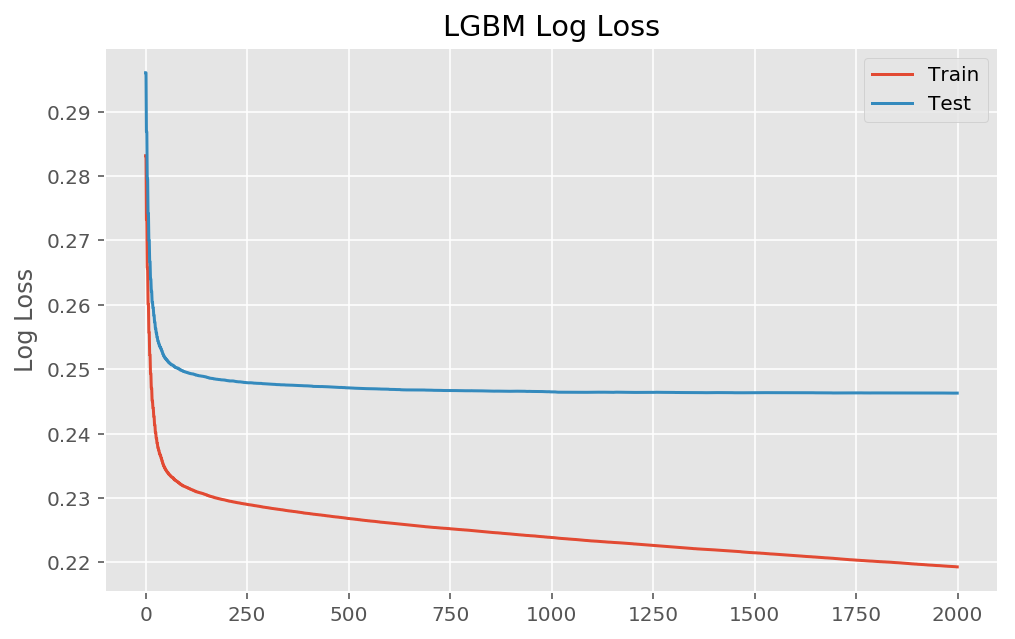

In [34]:
# retrieve performance metrics
results = model4.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()

### model5: model1 튜닝

In [46]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 1000,
    'min_data_in_leaf': 15,
    'min_sum_hessian_in_leaf': 15,
    'random_state': 42
}


model5= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model5.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284758	training's binary_logloss: 0.284758	valid_1's binary_logloss: 0.297672	valid_1's binary_logloss: 0.297672
[2]	training's binary_logloss: 0.275447	training's binary_logloss: 0.275447	valid_1's binary_logloss: 0.289054	valid_1's binary_logloss: 0.289054
[3]	training's binary_logloss: 0.268255	training's binary_logloss: 0.268255	valid_1's binary_logloss: 0.281964	valid_1's binary_logloss: 0.281964
[4]	training's binary_logloss: 0.262716	training's binary_logloss: 0.262716	valid_1's binary_logloss: 0.276621	valid_1's binary_logloss: 0.276621
[5]	training's binary_logloss: 0.258306	training's binary_logloss: 0.258306	valid_1's binary_logloss: 0.272412	valid_1's binary_logloss: 0.272412
[6]	training's binary_logloss: 0.254754	training's binary_logloss: 0.254754	valid_1's binary_logloss: 0.268995	valid_1's binary_logloss: 0.268995
[7]	training's binary_logloss: 0.251732	training's binary_logloss: 0.251732	valid_1's binary_logloss: 0.26615	valid_1's bina

[57]	training's binary_logloss: 0.231652	training's binary_logloss: 0.231652	valid_1's binary_logloss: 0.249563	valid_1's binary_logloss: 0.249563
[58]	training's binary_logloss: 0.231591	training's binary_logloss: 0.231591	valid_1's binary_logloss: 0.249536	valid_1's binary_logloss: 0.249536
[59]	training's binary_logloss: 0.231544	training's binary_logloss: 0.231544	valid_1's binary_logloss: 0.249524	valid_1's binary_logloss: 0.249524
[60]	training's binary_logloss: 0.23147	training's binary_logloss: 0.23147	valid_1's binary_logloss: 0.249467	valid_1's binary_logloss: 0.249467
[61]	training's binary_logloss: 0.231423	training's binary_logloss: 0.231423	valid_1's binary_logloss: 0.249421	valid_1's binary_logloss: 0.249421
[62]	training's binary_logloss: 0.231391	training's binary_logloss: 0.231391	valid_1's binary_logloss: 0.249395	valid_1's binary_logloss: 0.249395
[63]	training's binary_logloss: 0.231312	training's binary_logloss: 0.231312	valid_1's binary_logloss: 0.249333	valid_1'

[113]	training's binary_logloss: 0.229552	training's binary_logloss: 0.229552	valid_1's binary_logloss: 0.248183	valid_1's binary_logloss: 0.248183
[114]	training's binary_logloss: 0.229522	training's binary_logloss: 0.229522	valid_1's binary_logloss: 0.248159	valid_1's binary_logloss: 0.248159
[115]	training's binary_logloss: 0.229489	training's binary_logloss: 0.229489	valid_1's binary_logloss: 0.248138	valid_1's binary_logloss: 0.248138
[116]	training's binary_logloss: 0.229466	training's binary_logloss: 0.229466	valid_1's binary_logloss: 0.248131	valid_1's binary_logloss: 0.248131
[117]	training's binary_logloss: 0.229444	training's binary_logloss: 0.229444	valid_1's binary_logloss: 0.248122	valid_1's binary_logloss: 0.248122
[118]	training's binary_logloss: 0.229419	training's binary_logloss: 0.229419	valid_1's binary_logloss: 0.248115	valid_1's binary_logloss: 0.248115
[119]	training's binary_logloss: 0.229395	training's binary_logloss: 0.229395	valid_1's binary_logloss: 0.248099

[169]	training's binary_logloss: 0.228412	training's binary_logloss: 0.228412	valid_1's binary_logloss: 0.247622	valid_1's binary_logloss: 0.247622
[170]	training's binary_logloss: 0.228398	training's binary_logloss: 0.228398	valid_1's binary_logloss: 0.247624	valid_1's binary_logloss: 0.247624
[171]	training's binary_logloss: 0.228377	training's binary_logloss: 0.228377	valid_1's binary_logloss: 0.247612	valid_1's binary_logloss: 0.247612
[172]	training's binary_logloss: 0.22836	training's binary_logloss: 0.22836	valid_1's binary_logloss: 0.247602	valid_1's binary_logloss: 0.247602
[173]	training's binary_logloss: 0.228344	training's binary_logloss: 0.228344	valid_1's binary_logloss: 0.247596	valid_1's binary_logloss: 0.247596
[174]	training's binary_logloss: 0.228331	training's binary_logloss: 0.228331	valid_1's binary_logloss: 0.247592	valid_1's binary_logloss: 0.247592
[175]	training's binary_logloss: 0.228305	training's binary_logloss: 0.228305	valid_1's binary_logloss: 0.247587	v

[226]	training's binary_logloss: 0.227505	training's binary_logloss: 0.227505	valid_1's binary_logloss: 0.247248	valid_1's binary_logloss: 0.247248
[227]	training's binary_logloss: 0.227494	training's binary_logloss: 0.227494	valid_1's binary_logloss: 0.247248	valid_1's binary_logloss: 0.247248
[228]	training's binary_logloss: 0.227479	training's binary_logloss: 0.227479	valid_1's binary_logloss: 0.247245	valid_1's binary_logloss: 0.247245
[229]	training's binary_logloss: 0.227466	training's binary_logloss: 0.227466	valid_1's binary_logloss: 0.247236	valid_1's binary_logloss: 0.247236
[230]	training's binary_logloss: 0.227445	training's binary_logloss: 0.227445	valid_1's binary_logloss: 0.247233	valid_1's binary_logloss: 0.247233
[231]	training's binary_logloss: 0.227427	training's binary_logloss: 0.227427	valid_1's binary_logloss: 0.247227	valid_1's binary_logloss: 0.247227
[232]	training's binary_logloss: 0.227416	training's binary_logloss: 0.227416	valid_1's binary_logloss: 0.247223

[283]	training's binary_logloss: 0.226739	training's binary_logloss: 0.226739	valid_1's binary_logloss: 0.247028	valid_1's binary_logloss: 0.247028
[284]	training's binary_logloss: 0.22673	training's binary_logloss: 0.22673	valid_1's binary_logloss: 0.247026	valid_1's binary_logloss: 0.247026
[285]	training's binary_logloss: 0.226722	training's binary_logloss: 0.226722	valid_1's binary_logloss: 0.247024	valid_1's binary_logloss: 0.247024
[286]	training's binary_logloss: 0.226703	training's binary_logloss: 0.226703	valid_1's binary_logloss: 0.247008	valid_1's binary_logloss: 0.247008
[287]	training's binary_logloss: 0.22669	training's binary_logloss: 0.22669	valid_1's binary_logloss: 0.247	valid_1's binary_logloss: 0.247
[288]	training's binary_logloss: 0.226677	training's binary_logloss: 0.226677	valid_1's binary_logloss: 0.246996	valid_1's binary_logloss: 0.246996
[289]	training's binary_logloss: 0.226663	training's binary_logloss: 0.226663	valid_1's binary_logloss: 0.246989	valid_1's

[340]	training's binary_logloss: 0.226075	training's binary_logloss: 0.226075	valid_1's binary_logloss: 0.246826	valid_1's binary_logloss: 0.246826
[341]	training's binary_logloss: 0.226067	training's binary_logloss: 0.226067	valid_1's binary_logloss: 0.246824	valid_1's binary_logloss: 0.246824
[342]	training's binary_logloss: 0.226055	training's binary_logloss: 0.226055	valid_1's binary_logloss: 0.246823	valid_1's binary_logloss: 0.246823
[343]	training's binary_logloss: 0.226044	training's binary_logloss: 0.226044	valid_1's binary_logloss: 0.246821	valid_1's binary_logloss: 0.246821
[344]	training's binary_logloss: 0.226032	training's binary_logloss: 0.226032	valid_1's binary_logloss: 0.246819	valid_1's binary_logloss: 0.246819
[345]	training's binary_logloss: 0.226017	training's binary_logloss: 0.226017	valid_1's binary_logloss: 0.246817	valid_1's binary_logloss: 0.246817
[346]	training's binary_logloss: 0.226009	training's binary_logloss: 0.226009	valid_1's binary_logloss: 0.246818

[396]	training's binary_logloss: 0.225436	training's binary_logloss: 0.225436	valid_1's binary_logloss: 0.24667	valid_1's binary_logloss: 0.24667
[397]	training's binary_logloss: 0.225427	training's binary_logloss: 0.225427	valid_1's binary_logloss: 0.246672	valid_1's binary_logloss: 0.246672
[398]	training's binary_logloss: 0.225418	training's binary_logloss: 0.225418	valid_1's binary_logloss: 0.246672	valid_1's binary_logloss: 0.246672
[399]	training's binary_logloss: 0.225412	training's binary_logloss: 0.225412	valid_1's binary_logloss: 0.24667	valid_1's binary_logloss: 0.24667
[400]	training's binary_logloss: 0.225402	training's binary_logloss: 0.225402	valid_1's binary_logloss: 0.24667	valid_1's binary_logloss: 0.24667
[401]	training's binary_logloss: 0.225396	training's binary_logloss: 0.225396	valid_1's binary_logloss: 0.246668	valid_1's binary_logloss: 0.246668
[402]	training's binary_logloss: 0.225382	training's binary_logloss: 0.225382	valid_1's binary_logloss: 0.246664	valid

[453]	training's binary_logloss: 0.224806	training's binary_logloss: 0.224806	valid_1's binary_logloss: 0.246567	valid_1's binary_logloss: 0.246567
[454]	training's binary_logloss: 0.224796	training's binary_logloss: 0.224796	valid_1's binary_logloss: 0.246568	valid_1's binary_logloss: 0.246568
[455]	training's binary_logloss: 0.224783	training's binary_logloss: 0.224783	valid_1's binary_logloss: 0.246568	valid_1's binary_logloss: 0.246568
[456]	training's binary_logloss: 0.224776	training's binary_logloss: 0.224776	valid_1's binary_logloss: 0.246566	valid_1's binary_logloss: 0.246566
[457]	training's binary_logloss: 0.224762	training's binary_logloss: 0.224762	valid_1's binary_logloss: 0.24657	valid_1's binary_logloss: 0.24657
[458]	training's binary_logloss: 0.224751	training's binary_logloss: 0.224751	valid_1's binary_logloss: 0.246575	valid_1's binary_logloss: 0.246575
[459]	training's binary_logloss: 0.22474	training's binary_logloss: 0.22474	valid_1's binary_logloss: 0.246571	val

[509]	training's binary_logloss: 0.224242	training's binary_logloss: 0.224242	valid_1's binary_logloss: 0.246482	valid_1's binary_logloss: 0.246482
[510]	training's binary_logloss: 0.224229	training's binary_logloss: 0.224229	valid_1's binary_logloss: 0.246478	valid_1's binary_logloss: 0.246478
[511]	training's binary_logloss: 0.224221	training's binary_logloss: 0.224221	valid_1's binary_logloss: 0.246478	valid_1's binary_logloss: 0.246478
[512]	training's binary_logloss: 0.224207	training's binary_logloss: 0.224207	valid_1's binary_logloss: 0.246478	valid_1's binary_logloss: 0.246478
[513]	training's binary_logloss: 0.224199	training's binary_logloss: 0.224199	valid_1's binary_logloss: 0.24648	valid_1's binary_logloss: 0.24648
[514]	training's binary_logloss: 0.224191	training's binary_logloss: 0.224191	valid_1's binary_logloss: 0.246478	valid_1's binary_logloss: 0.246478
[515]	training's binary_logloss: 0.224178	training's binary_logloss: 0.224178	valid_1's binary_logloss: 0.246478	v

[566]	training's binary_logloss: 0.223669	training's binary_logloss: 0.223669	valid_1's binary_logloss: 0.246425	valid_1's binary_logloss: 0.246425
[567]	training's binary_logloss: 0.223662	training's binary_logloss: 0.223662	valid_1's binary_logloss: 0.246426	valid_1's binary_logloss: 0.246426
[568]	training's binary_logloss: 0.223656	training's binary_logloss: 0.223656	valid_1's binary_logloss: 0.246423	valid_1's binary_logloss: 0.246423
[569]	training's binary_logloss: 0.223643	training's binary_logloss: 0.223643	valid_1's binary_logloss: 0.246424	valid_1's binary_logloss: 0.246424
[570]	training's binary_logloss: 0.223632	training's binary_logloss: 0.223632	valid_1's binary_logloss: 0.246425	valid_1's binary_logloss: 0.246425
[571]	training's binary_logloss: 0.223627	training's binary_logloss: 0.223627	valid_1's binary_logloss: 0.246426	valid_1's binary_logloss: 0.246426
[572]	training's binary_logloss: 0.223621	training's binary_logloss: 0.223621	valid_1's binary_logloss: 0.246429

[623]	training's binary_logloss: 0.223135	training's binary_logloss: 0.223135	valid_1's binary_logloss: 0.246397	valid_1's binary_logloss: 0.246397
[624]	training's binary_logloss: 0.223123	training's binary_logloss: 0.223123	valid_1's binary_logloss: 0.246394	valid_1's binary_logloss: 0.246394
[625]	training's binary_logloss: 0.223113	training's binary_logloss: 0.223113	valid_1's binary_logloss: 0.246396	valid_1's binary_logloss: 0.246396
[626]	training's binary_logloss: 0.223103	training's binary_logloss: 0.223103	valid_1's binary_logloss: 0.246394	valid_1's binary_logloss: 0.246394
[627]	training's binary_logloss: 0.223096	training's binary_logloss: 0.223096	valid_1's binary_logloss: 0.246394	valid_1's binary_logloss: 0.246394
[628]	training's binary_logloss: 0.223089	training's binary_logloss: 0.223089	valid_1's binary_logloss: 0.246396	valid_1's binary_logloss: 0.246396
[629]	training's binary_logloss: 0.223081	training's binary_logloss: 0.223081	valid_1's binary_logloss: 0.246395

[680]	training's binary_logloss: 0.222599	training's binary_logloss: 0.222599	valid_1's binary_logloss: 0.246341	valid_1's binary_logloss: 0.246341
[681]	training's binary_logloss: 0.222589	training's binary_logloss: 0.222589	valid_1's binary_logloss: 0.24634	valid_1's binary_logloss: 0.24634
[682]	training's binary_logloss: 0.222578	training's binary_logloss: 0.222578	valid_1's binary_logloss: 0.246336	valid_1's binary_logloss: 0.246336
[683]	training's binary_logloss: 0.222567	training's binary_logloss: 0.222567	valid_1's binary_logloss: 0.246337	valid_1's binary_logloss: 0.246337
[684]	training's binary_logloss: 0.222555	training's binary_logloss: 0.222555	valid_1's binary_logloss: 0.246333	valid_1's binary_logloss: 0.246333
[685]	training's binary_logloss: 0.222548	training's binary_logloss: 0.222548	valid_1's binary_logloss: 0.246333	valid_1's binary_logloss: 0.246333
[686]	training's binary_logloss: 0.222542	training's binary_logloss: 0.222542	valid_1's binary_logloss: 0.24634	va

[737]	training's binary_logloss: 0.222076	training's binary_logloss: 0.222076	valid_1's binary_logloss: 0.246351	valid_1's binary_logloss: 0.246351
[738]	training's binary_logloss: 0.222068	training's binary_logloss: 0.222068	valid_1's binary_logloss: 0.246357	valid_1's binary_logloss: 0.246357
[739]	training's binary_logloss: 0.222055	training's binary_logloss: 0.222055	valid_1's binary_logloss: 0.246354	valid_1's binary_logloss: 0.246354
[740]	training's binary_logloss: 0.22205	training's binary_logloss: 0.22205	valid_1's binary_logloss: 0.246357	valid_1's binary_logloss: 0.246357
[741]	training's binary_logloss: 0.222043	training's binary_logloss: 0.222043	valid_1's binary_logloss: 0.24635	valid_1's binary_logloss: 0.24635
[742]	training's binary_logloss: 0.222032	training's binary_logloss: 0.222032	valid_1's binary_logloss: 0.246351	valid_1's binary_logloss: 0.246351
[743]	training's binary_logloss: 0.222024	training's binary_logloss: 0.222024	valid_1's binary_logloss: 0.246349	val

[793]	training's binary_logloss: 0.221588	training's binary_logloss: 0.221588	valid_1's binary_logloss: 0.246303	valid_1's binary_logloss: 0.246303
[794]	training's binary_logloss: 0.221583	training's binary_logloss: 0.221583	valid_1's binary_logloss: 0.246309	valid_1's binary_logloss: 0.246309
[795]	training's binary_logloss: 0.221577	training's binary_logloss: 0.221577	valid_1's binary_logloss: 0.246308	valid_1's binary_logloss: 0.246308
[796]	training's binary_logloss: 0.221568	training's binary_logloss: 0.221568	valid_1's binary_logloss: 0.246312	valid_1's binary_logloss: 0.246312
[797]	training's binary_logloss: 0.221562	training's binary_logloss: 0.221562	valid_1's binary_logloss: 0.246315	valid_1's binary_logloss: 0.246315
[798]	training's binary_logloss: 0.221551	training's binary_logloss: 0.221551	valid_1's binary_logloss: 0.246318	valid_1's binary_logloss: 0.246318
[799]	training's binary_logloss: 0.221542	training's binary_logloss: 0.221542	valid_1's binary_logloss: 0.246316

[849]	training's binary_logloss: 0.221115	training's binary_logloss: 0.221115	valid_1's binary_logloss: 0.246297	valid_1's binary_logloss: 0.246297
[850]	training's binary_logloss: 0.221108	training's binary_logloss: 0.221108	valid_1's binary_logloss: 0.246299	valid_1's binary_logloss: 0.246299
[851]	training's binary_logloss: 0.221096	training's binary_logloss: 0.221096	valid_1's binary_logloss: 0.246298	valid_1's binary_logloss: 0.246298
[852]	training's binary_logloss: 0.221088	training's binary_logloss: 0.221088	valid_1's binary_logloss: 0.246296	valid_1's binary_logloss: 0.246296
[853]	training's binary_logloss: 0.221078	training's binary_logloss: 0.221078	valid_1's binary_logloss: 0.246297	valid_1's binary_logloss: 0.246297
[854]	training's binary_logloss: 0.22107	training's binary_logloss: 0.22107	valid_1's binary_logloss: 0.246295	valid_1's binary_logloss: 0.246295
[855]	training's binary_logloss: 0.22106	training's binary_logloss: 0.22106	valid_1's binary_logloss: 0.246292	val

[905]	training's binary_logloss: 0.220637	training's binary_logloss: 0.220637	valid_1's binary_logloss: 0.246279	valid_1's binary_logloss: 0.246279
[906]	training's binary_logloss: 0.220627	training's binary_logloss: 0.220627	valid_1's binary_logloss: 0.24628	valid_1's binary_logloss: 0.24628
[907]	training's binary_logloss: 0.220622	training's binary_logloss: 0.220622	valid_1's binary_logloss: 0.24628	valid_1's binary_logloss: 0.24628
[908]	training's binary_logloss: 0.220615	training's binary_logloss: 0.220615	valid_1's binary_logloss: 0.246282	valid_1's binary_logloss: 0.246282
[909]	training's binary_logloss: 0.220606	training's binary_logloss: 0.220606	valid_1's binary_logloss: 0.246283	valid_1's binary_logloss: 0.246283
[910]	training's binary_logloss: 0.220596	training's binary_logloss: 0.220596	valid_1's binary_logloss: 0.246282	valid_1's binary_logloss: 0.246282
[911]	training's binary_logloss: 0.220589	training's binary_logloss: 0.220589	valid_1's binary_logloss: 0.246283	val

[961]	training's binary_logloss: 0.220189	training's binary_logloss: 0.220189	valid_1's binary_logloss: 0.246263	valid_1's binary_logloss: 0.246263
[962]	training's binary_logloss: 0.220185	training's binary_logloss: 0.220185	valid_1's binary_logloss: 0.246262	valid_1's binary_logloss: 0.246262
[963]	training's binary_logloss: 0.220175	training's binary_logloss: 0.220175	valid_1's binary_logloss: 0.246265	valid_1's binary_logloss: 0.246265
[964]	training's binary_logloss: 0.220164	training's binary_logloss: 0.220164	valid_1's binary_logloss: 0.246268	valid_1's binary_logloss: 0.246268
[965]	training's binary_logloss: 0.220158	training's binary_logloss: 0.220158	valid_1's binary_logloss: 0.246266	valid_1's binary_logloss: 0.246266
[966]	training's binary_logloss: 0.22015	training's binary_logloss: 0.22015	valid_1's binary_logloss: 0.246267	valid_1's binary_logloss: 0.246267
[967]	training's binary_logloss: 0.220138	training's binary_logloss: 0.220138	valid_1's binary_logloss: 0.246267	v

LGBMClassifier(bagging_freq=15, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.24089912543315553,
               importance_type='split', learning_rate=0.1, max_bin=495,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=15, min_split_gain=0.0,
               min_sum_hessian_in_leaf=15, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=49, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [47]:
lg_loan_status_probas = model5.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.24626050651977277


## 최종모델 visualization

In [11]:
lg_loan_status_probas = model1.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.2461682389251206


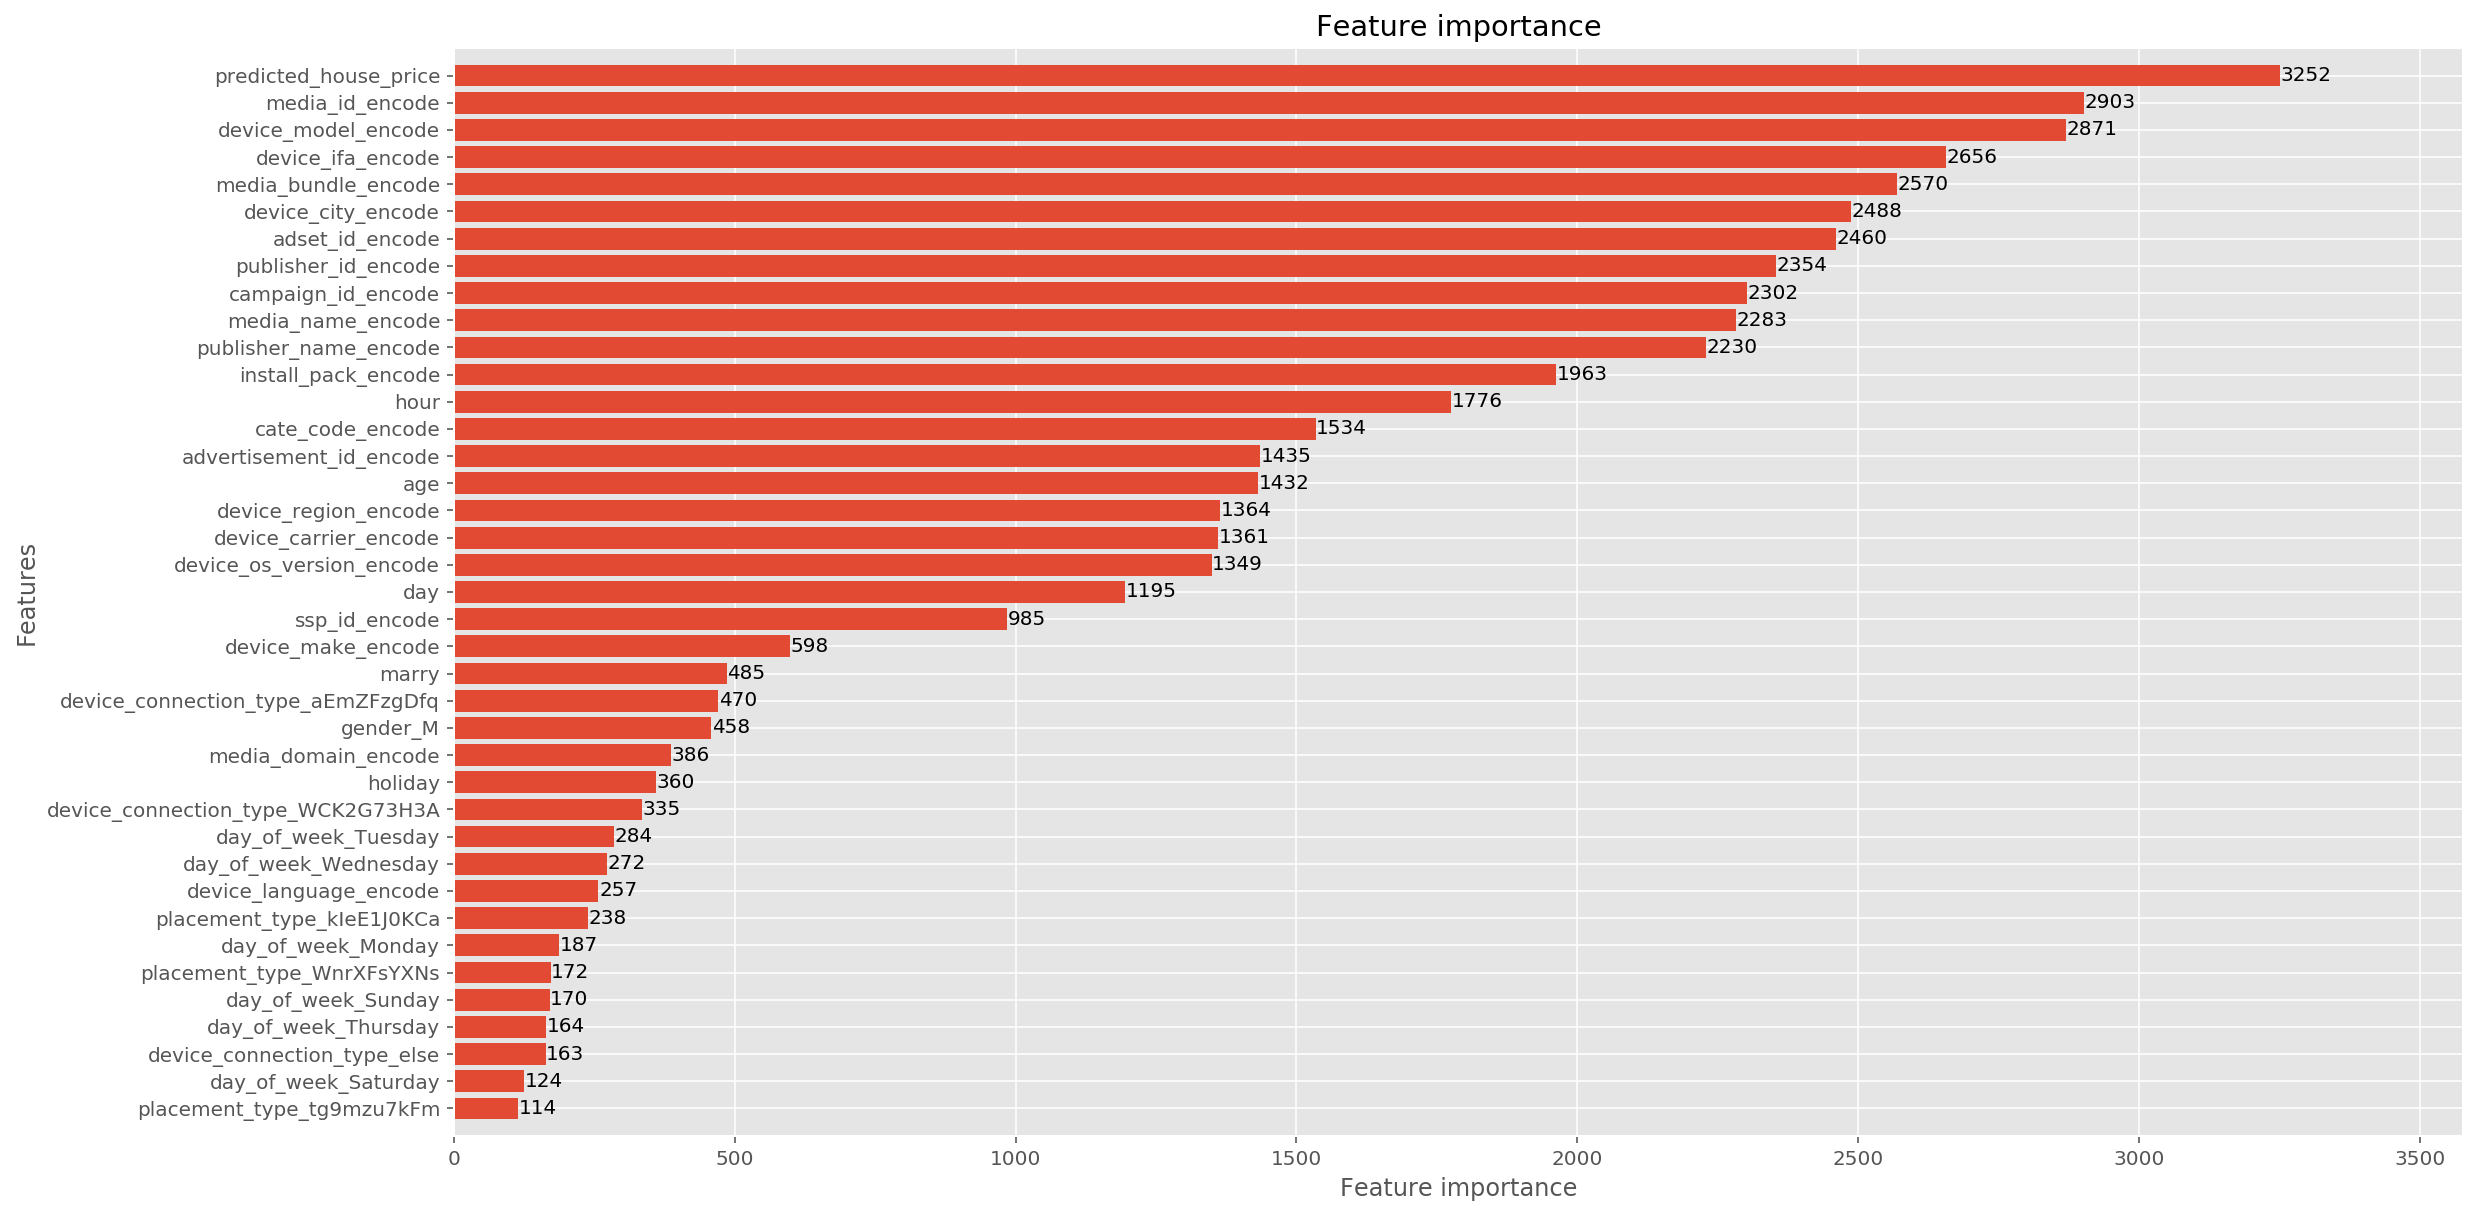

In [12]:
lightgbm.plot_importance(model1, max_num_features  = 100, ignore_zero=True, figsize = (18, 10), height=0.8)

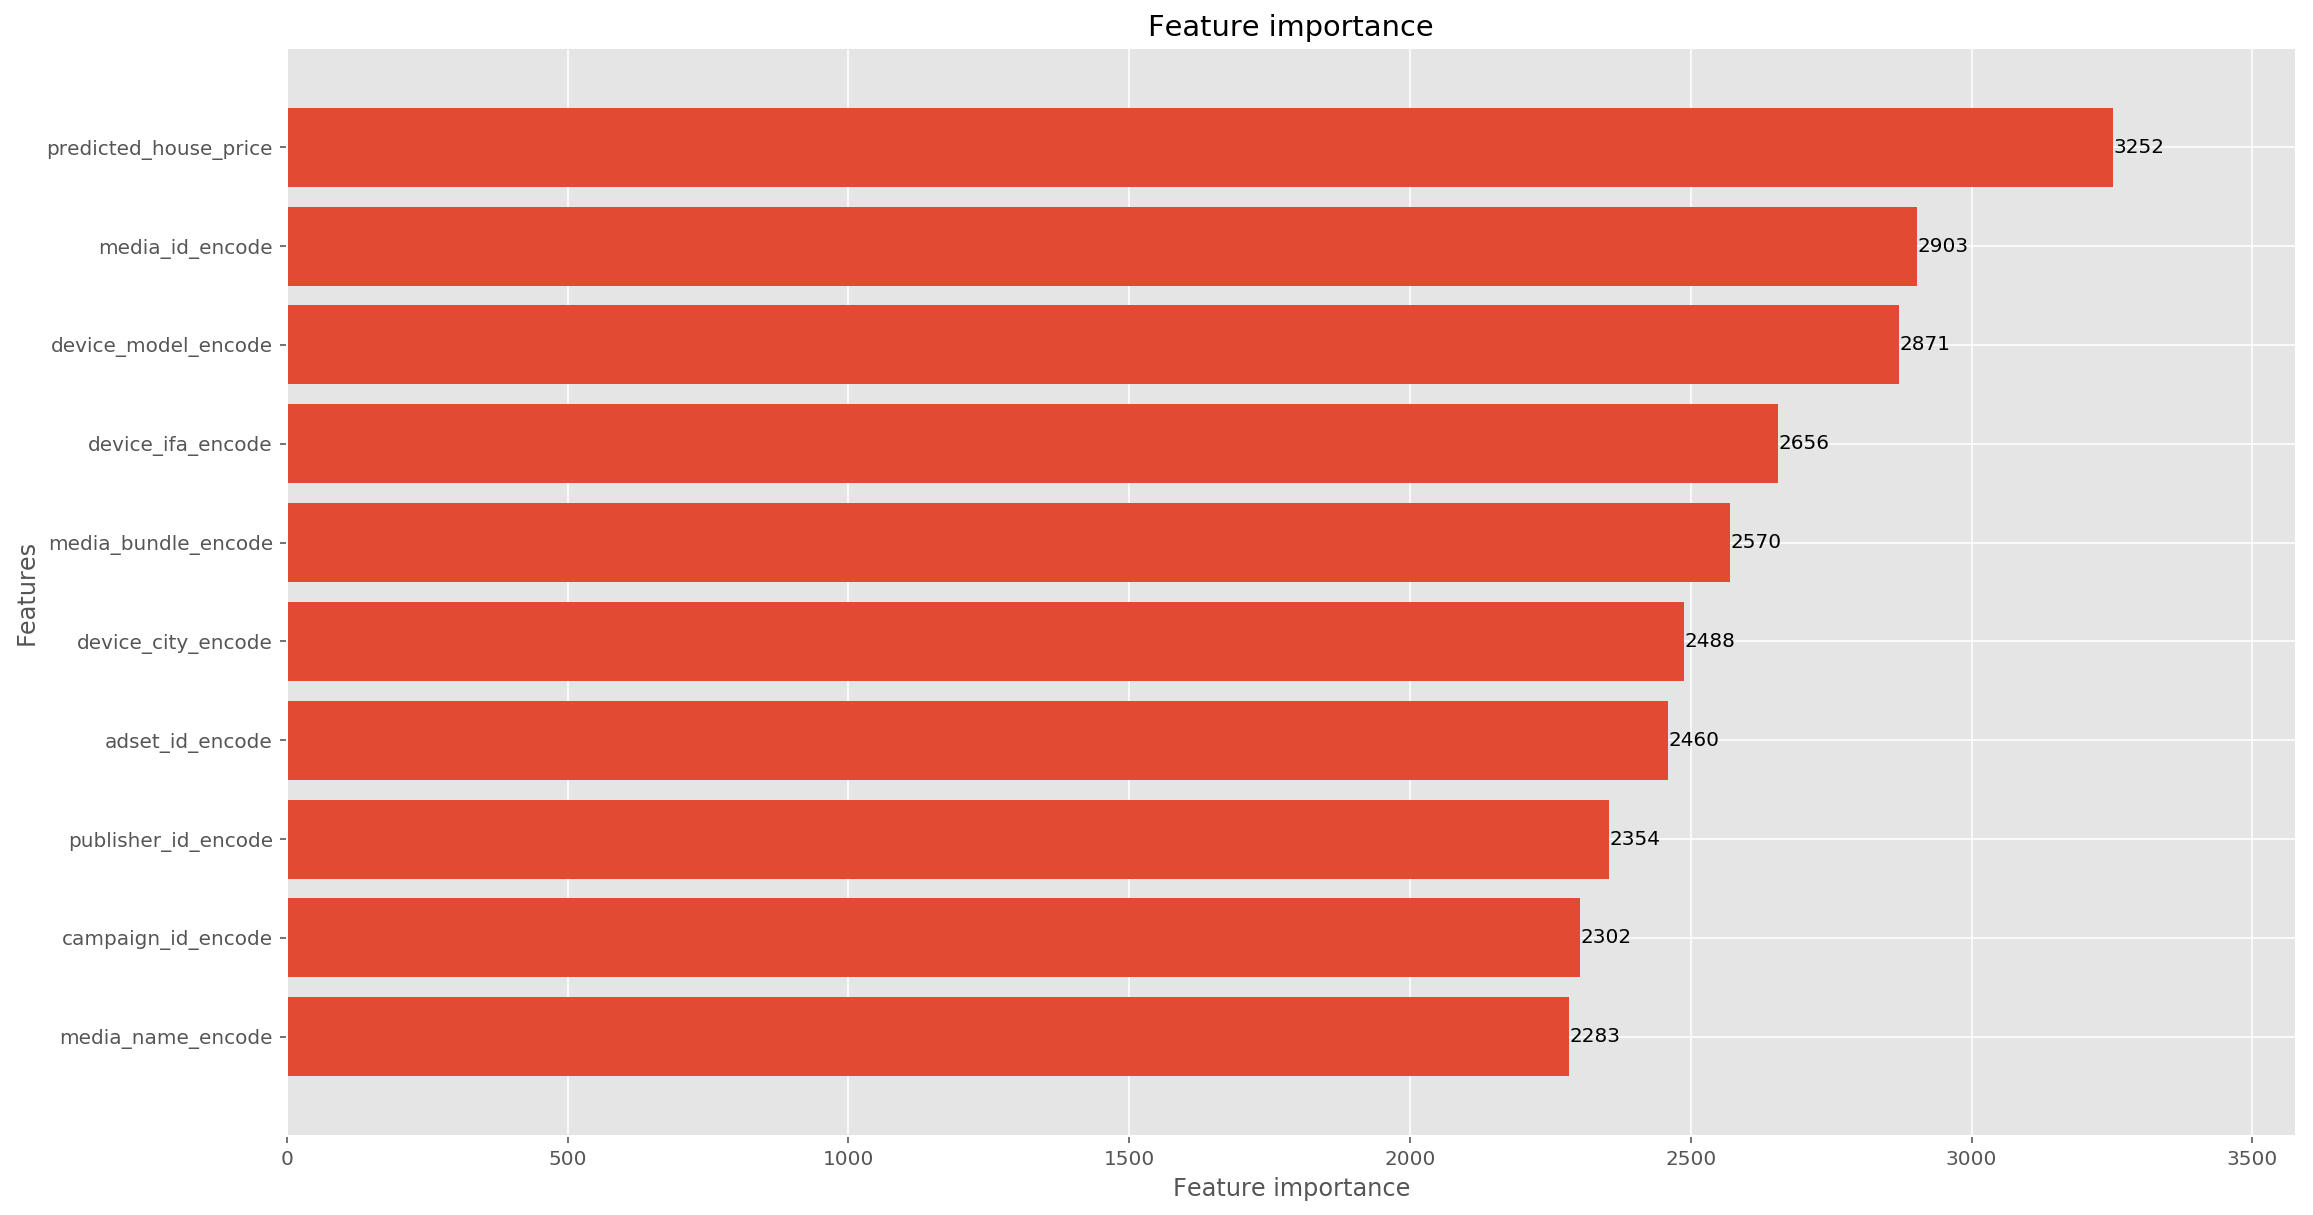

In [13]:
lightgbm.plot_importance(model1, max_num_features  = 10, ignore_zero=True, figsize = (18, 10), height=0.8)

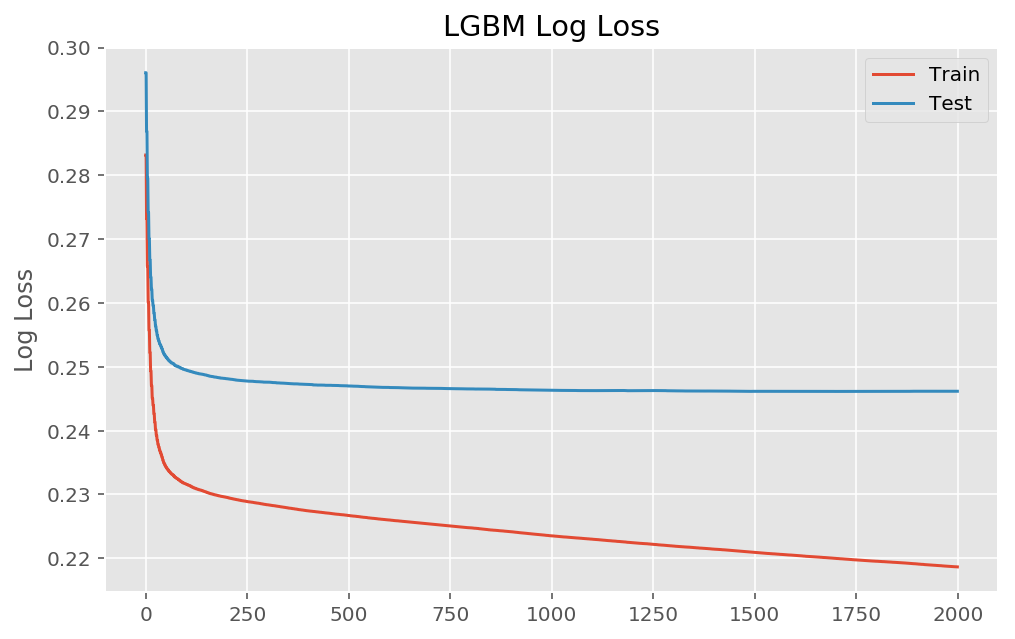

In [14]:
# retrieve performance metrics
results = model1.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()

In [15]:
!easy_install shap

Searching for shap
Best match: shap 0.30.0
Adding shap 0.30.0 to easy-install.pth file

Using c:\programdata\anaconda3\lib\site-packages
Processing dependencies for shap
Finished processing dependencies for shap


In [16]:
import shap

In [18]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model1)

In [19]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\shap\explainers\tree.py:195: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


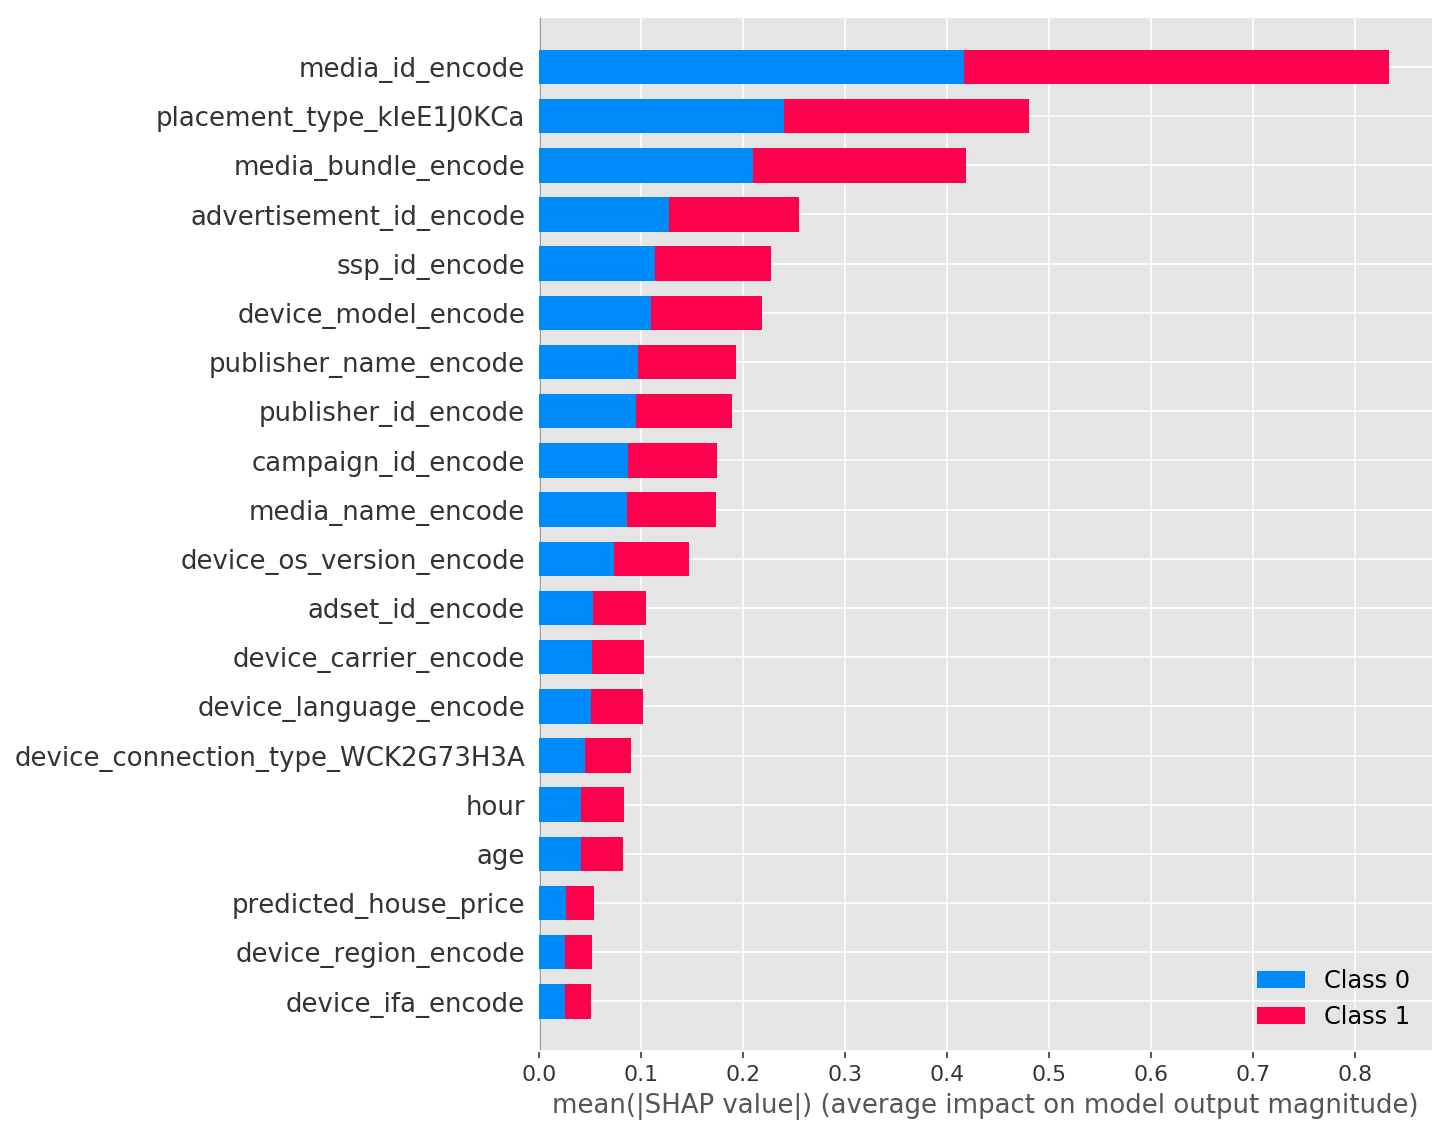

In [22]:
shap.summary_plot(shap_values, X_train)

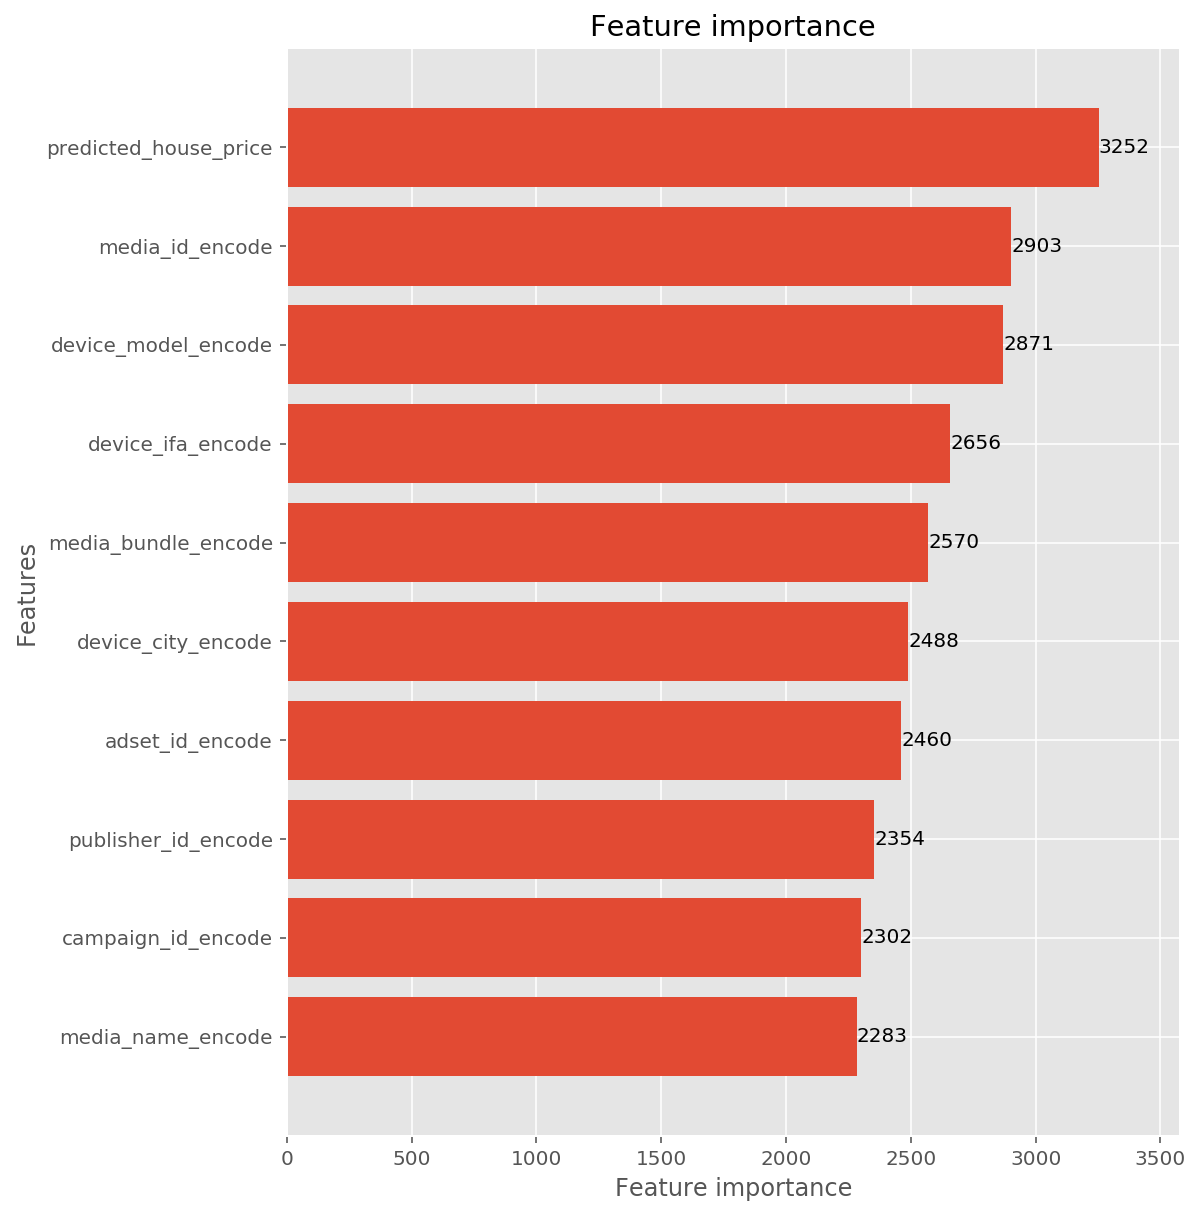

In [30]:
lightgbm.plot_importance(model1, max_num_features  = 10, ignore_zero=True, figsize = (8, 10), height=0.8)